In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from pandas.tools.plotting import scatter_matrix

df = pd.read_csv('MuRun.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042990 entries, 0 to 2042989
Data columns (total 21 columns):
Run      int64
Event    int64
Type1    object
E1       float64
px1      float64
py1      float64
pz1      float64
pt1      float64
eta1     float64
phi1     float64
Q1       int64
Type2    object
E2       float64
px2      float64
py2      float64
pz2      float64
pt2      float64
eta2     float64
phi2     float64
Q2       int64
M        float64
dtypes: float64(15), int64(4), object(2)
memory usage: 327.3+ MB


,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,146436,90830792,G,19.17120,3.817130,9.04323,-16.46730,9.81583,-1.289420,1.171390,...,T,5.43984,-0.362592,2.626990,-4.748490,2.65189,-1.345870,1.707960,1,2.73205
1,146436,90862225,G,12.94350,5.125790,-3.98369,-11.19730,6.49180,-1.313350,-0.660674,...,G,11.86360,4.789840,-6.262220,-8.864340,7.88403,-0.966622,-0.917841,1,3.10256
2,146436,90644850,G,12.39990,-0.849742,9.40110,8.04015,9.43943,0.772580,1.660940,...,G,8.55532,-4.851550,6.976960,-0.983229,8.49797,-0.115445,2.178410,-1,9.41149
3,146436,90678594,G,17.81320,-1.959590,2.80531,17.48110,3.42195,2.333500,2.180530,...,G,9.42174,4.365230,0.168017,8.347130,4.36846,1.403000,0.038471,1,7.74702
4,146436,90686690,G,7.95664,7.097000,-1.31646,3.34613,7.21806,0.448399,-0.183411,...,T,5.44467,-1.341760,1.386470,5.090250,1.92941,1.697380,2.339810,-1,8.67727


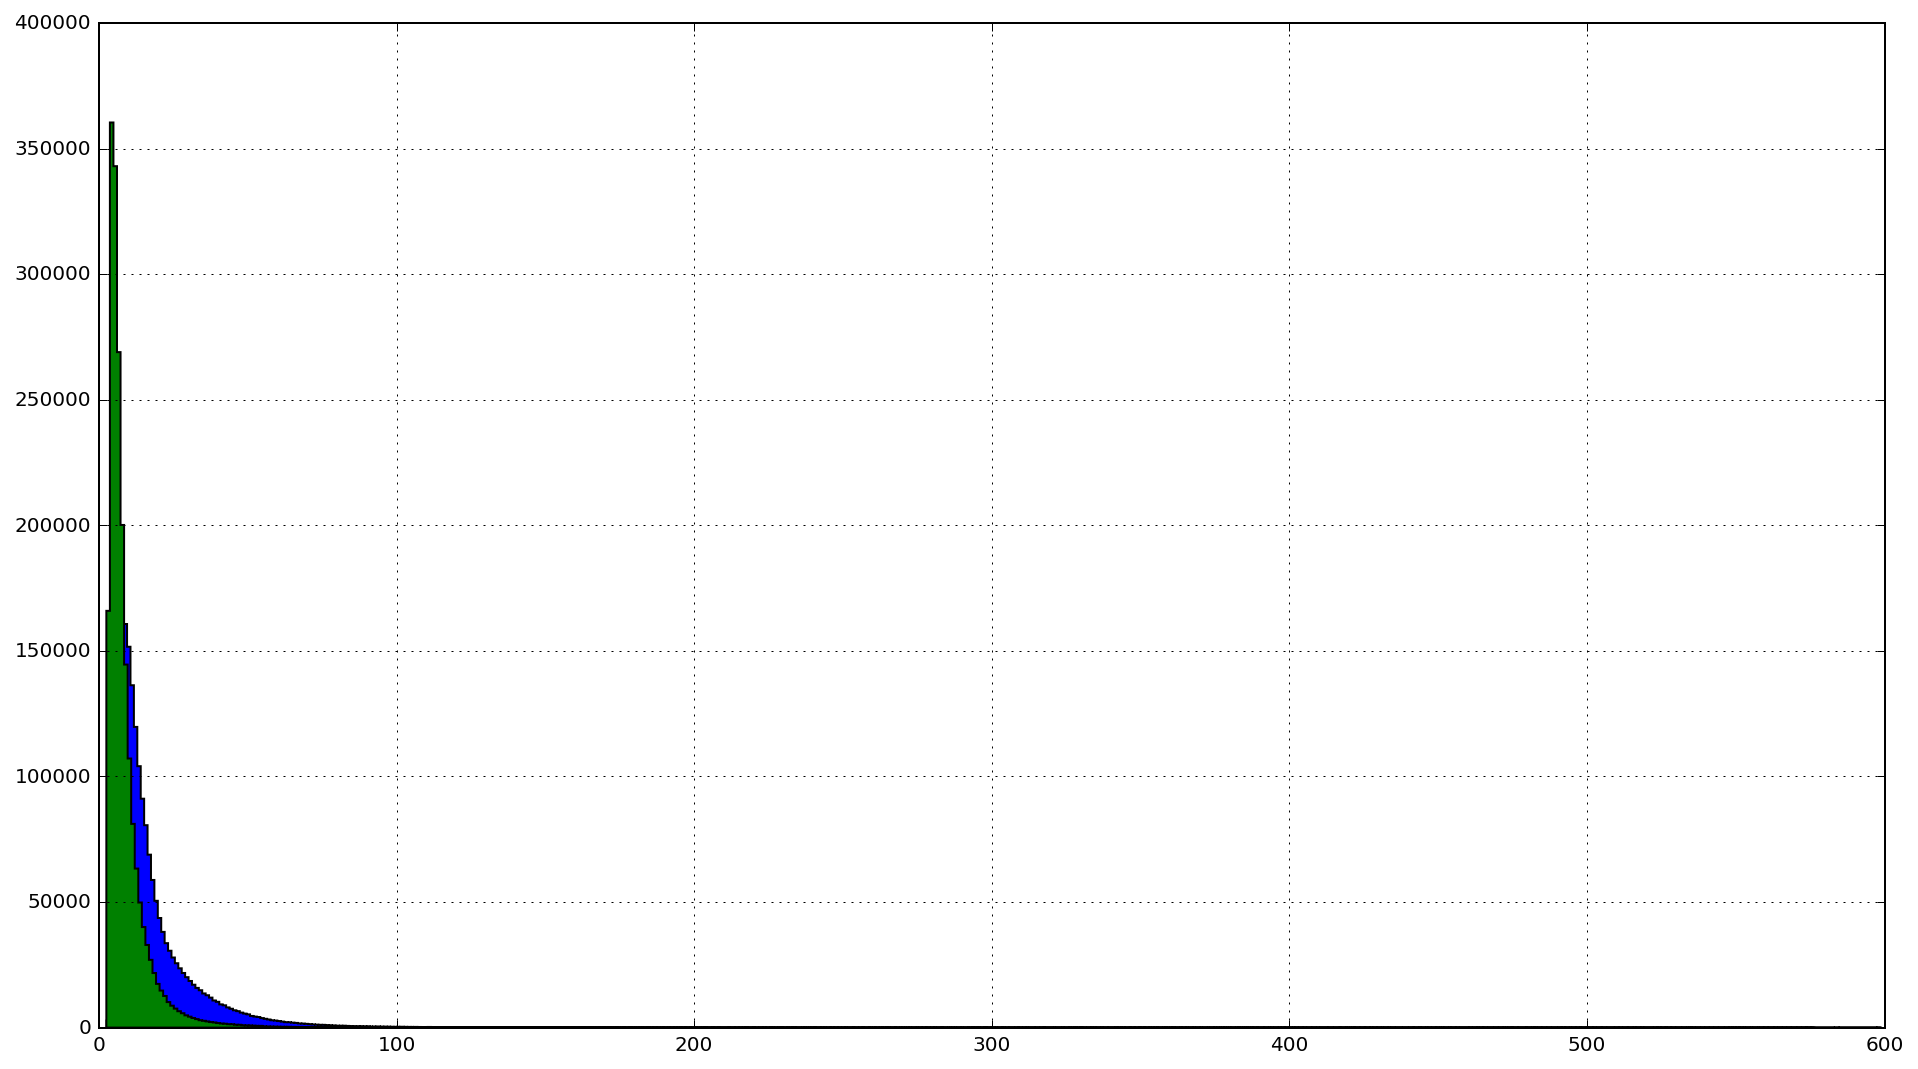

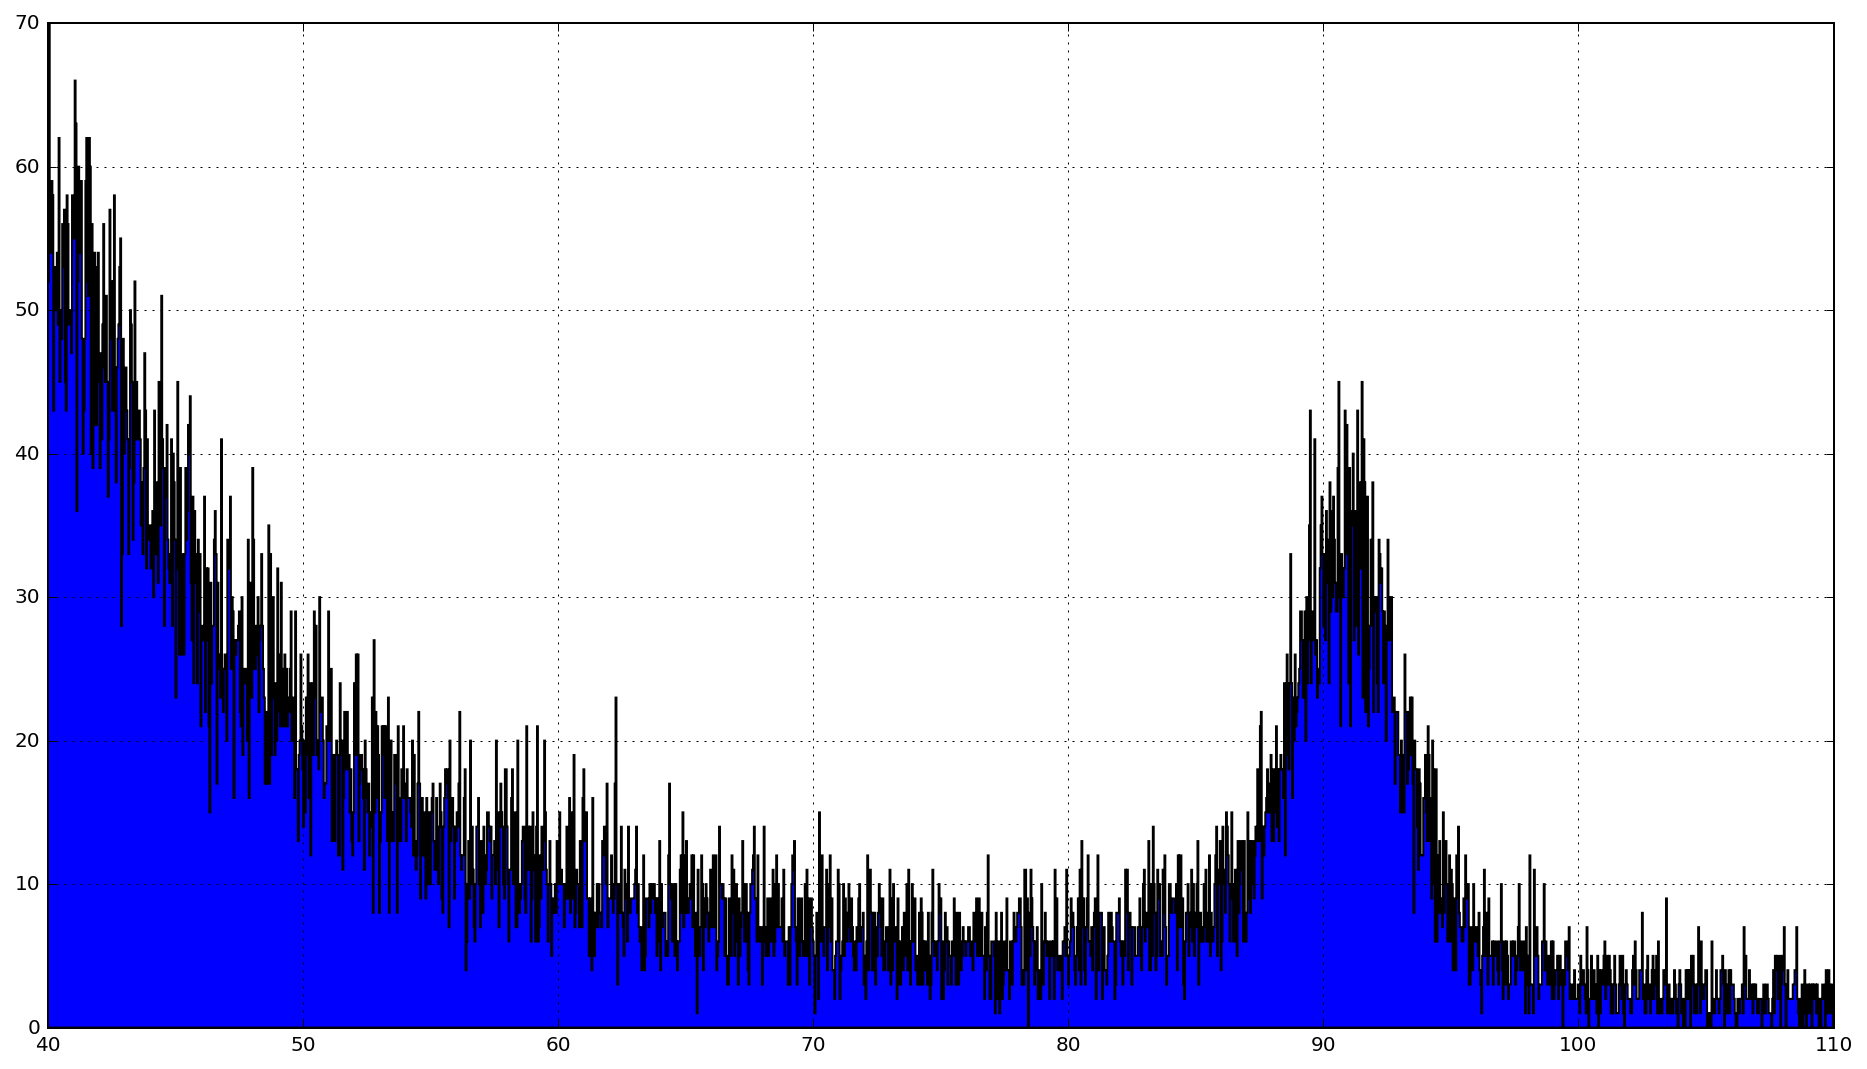

In [7]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
df[df.E1 < 600].E1.hist(bins=500,histtype=u'stepfilled')
df[df.E2 < 600].E2.hist(bins=500,histtype=u'stepfilled')

fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
df[df.M >40].M.hist(bins=2000,histtype=u'stepfilled')

In [23]:
muon = df[df.E1 < 100]
muon = muon[muon.E2 < 100]
muon = muon[abs(muon.px1) < 40]
muon = muon[abs(muon.px2) < 40]
muon = muon[abs(muon.py1) < 40]
muon = muon[abs(muon.py2) < 40]
muon = muon[abs(muon.pt1) < 40]
muon = muon[abs(muon.pt2) < 40]
muon = muon.drop(['Event','Run','Type1','Type2'],axis=1)
#muon
muon['mass1'] = np.sqrt(muon.E1**2 - muon.px1**2 - muon.py1**2 - muon.pz1**2)
muon['mass2'] = np.sqrt(muon.E2**2 - muon.px2**2 - muon.py2**2 - muon.pz2**2)

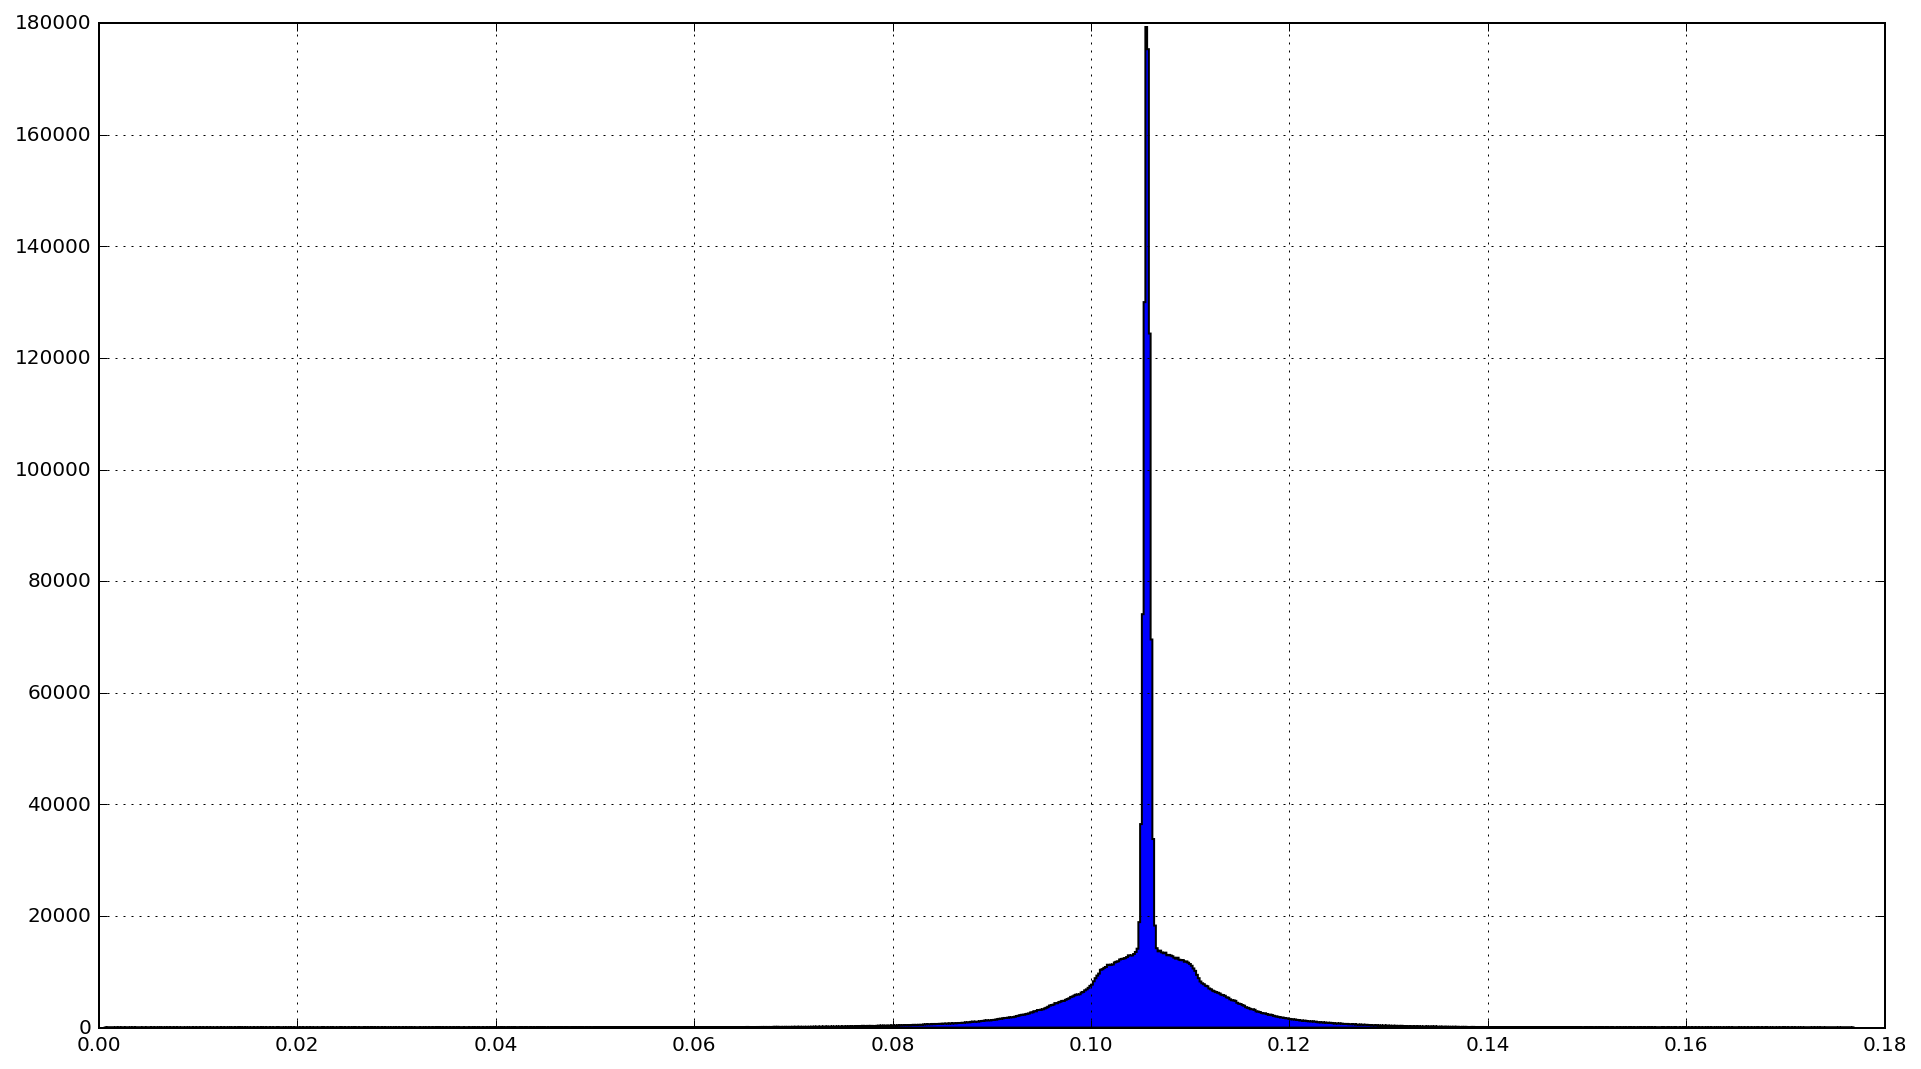

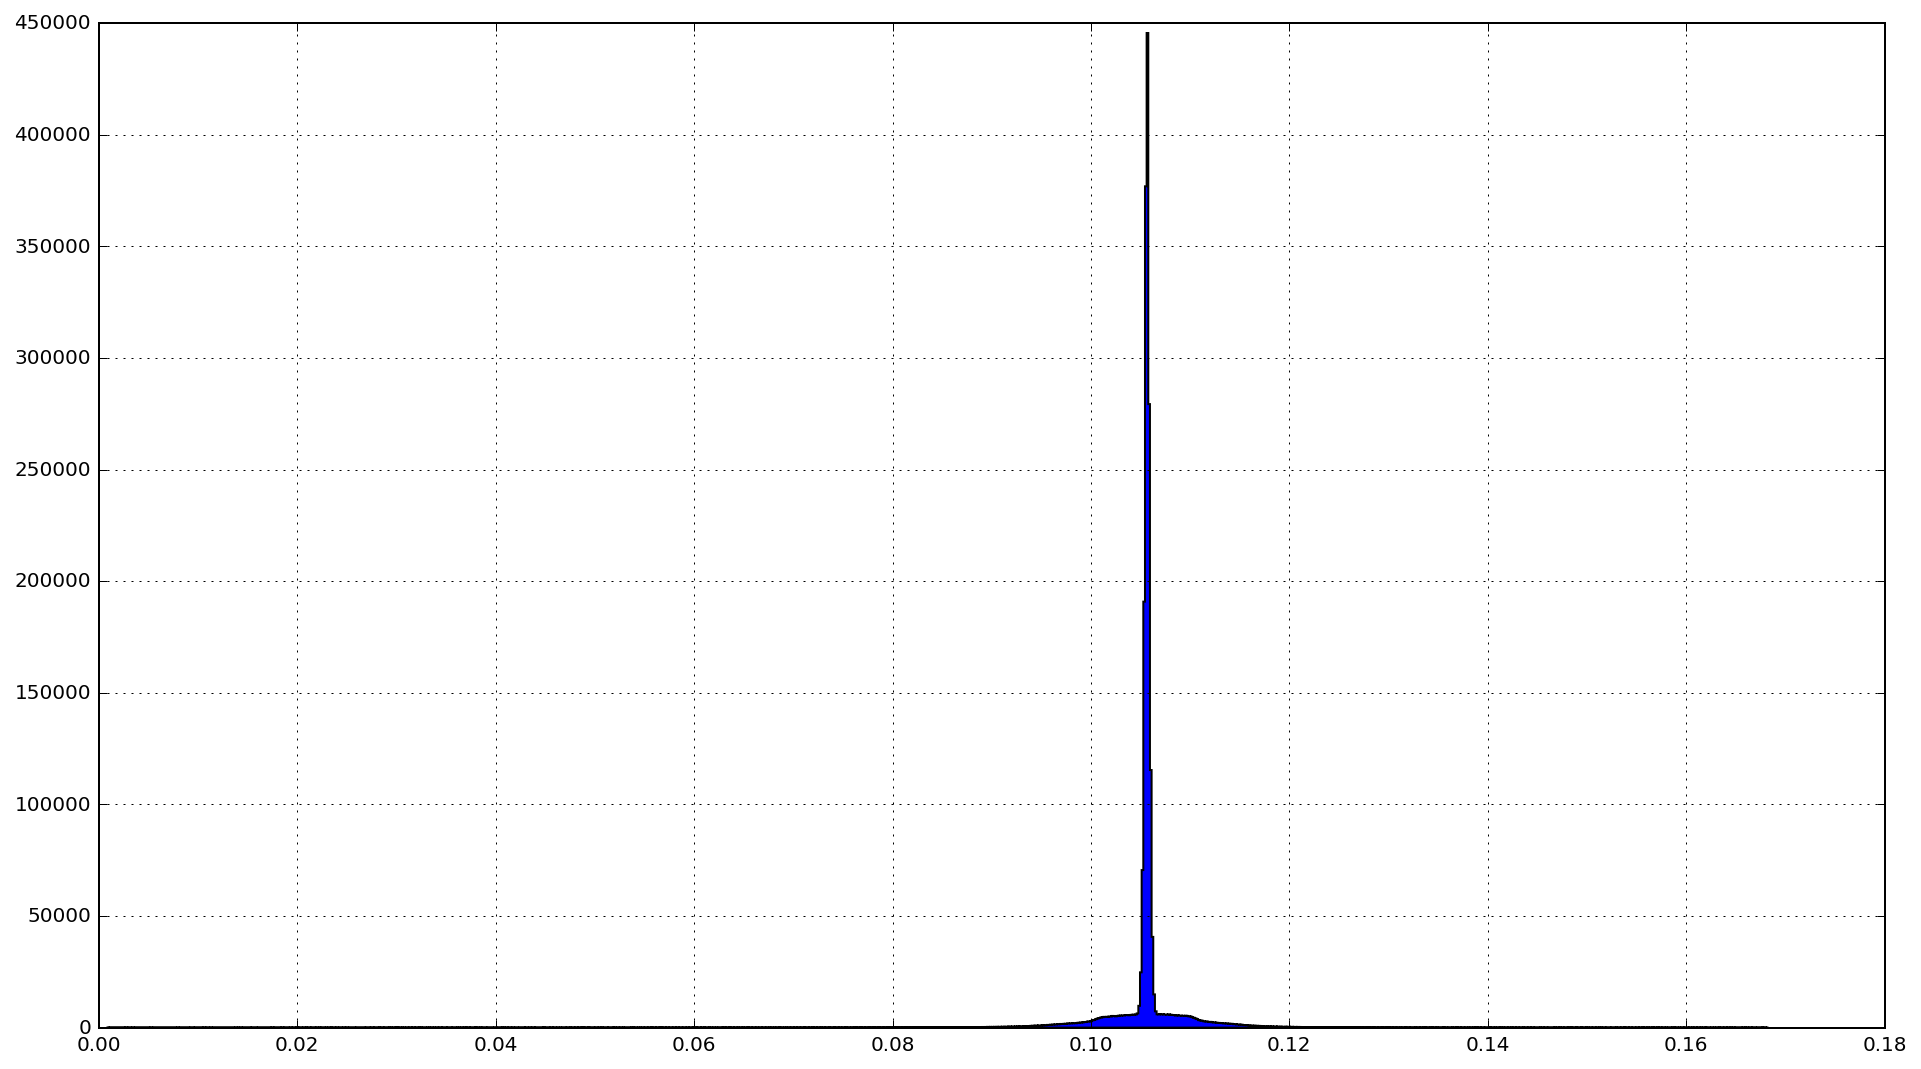

In [24]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
ax = muon.mass1.hist(bins=1000,histtype=u'stepfilled')
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
ax = muon.mass2.hist(bins=1000,histtype=u'stepfilled')
#ax.set_xlim([0.1,0.11])

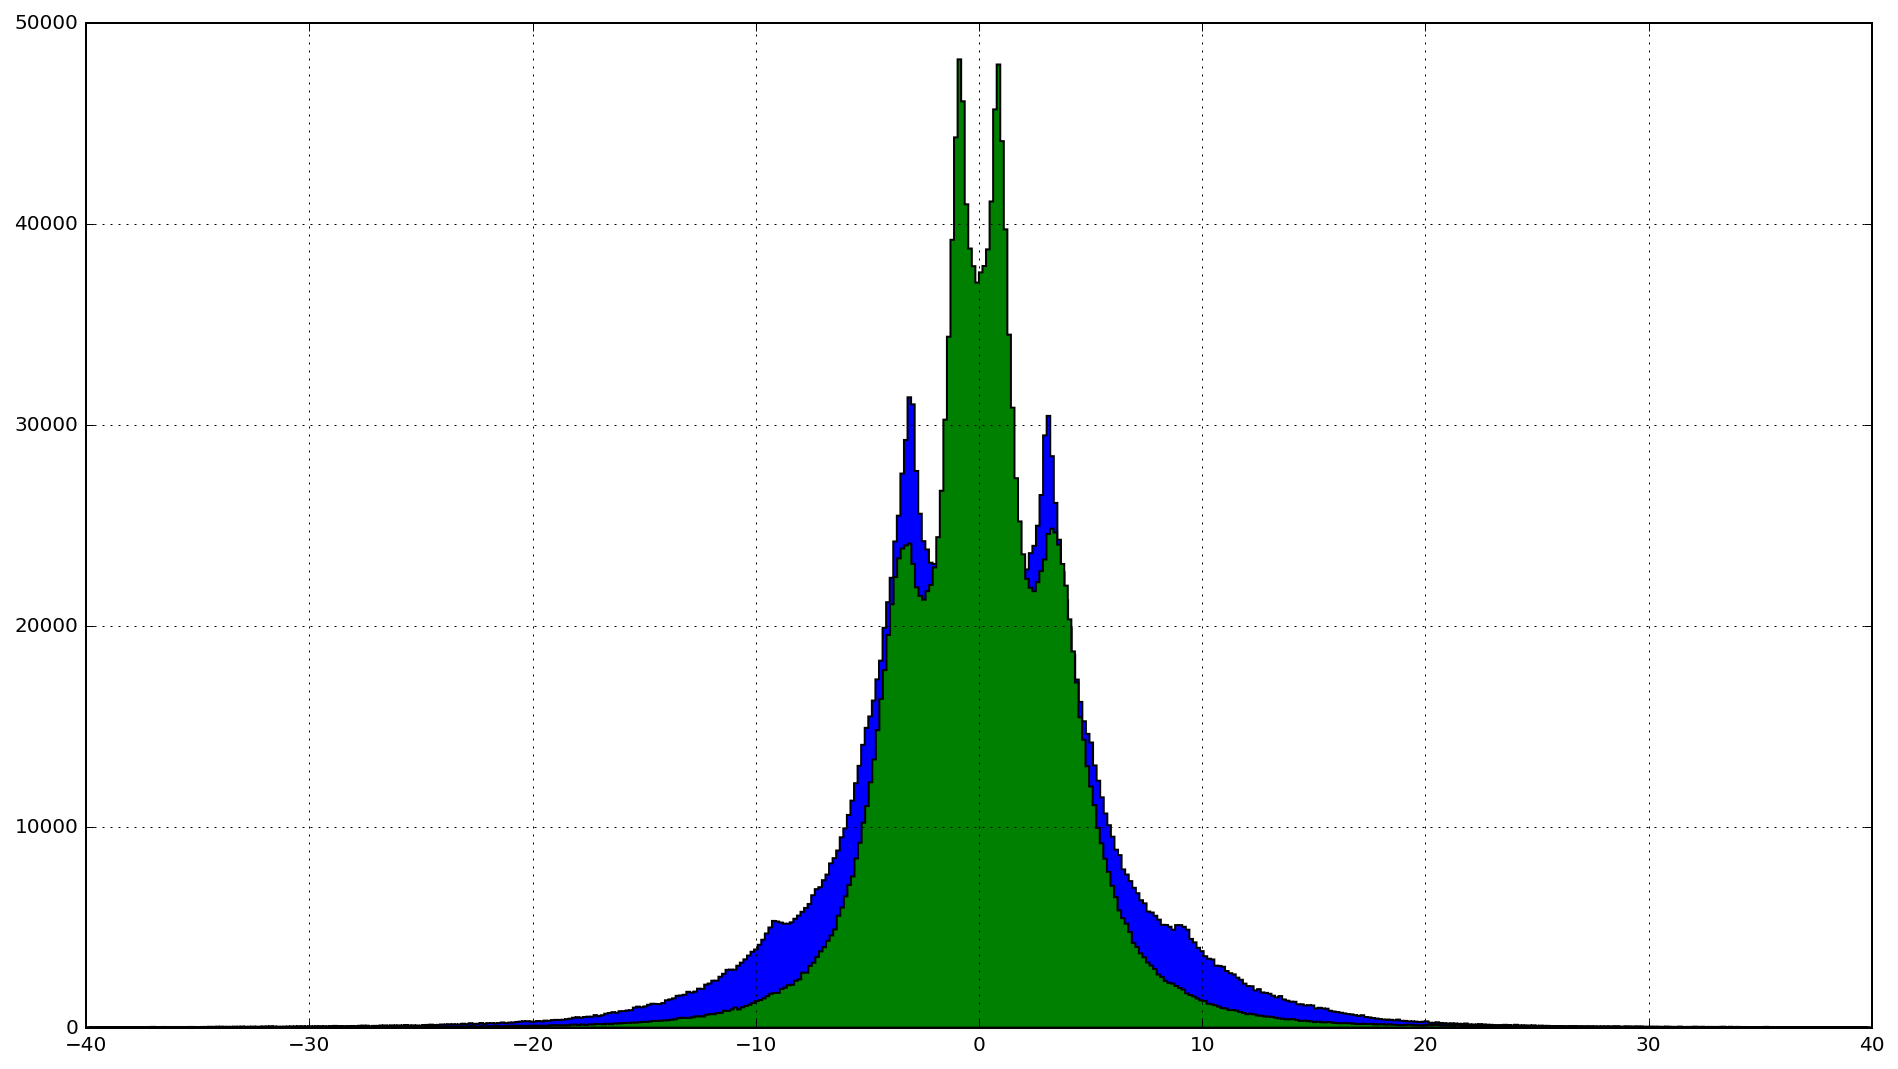

In [25]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
muon.py1.hist(bins=500,histtype=u'stepfilled')
muon.py2.hist(bins=500,histtype=u'stepfilled')

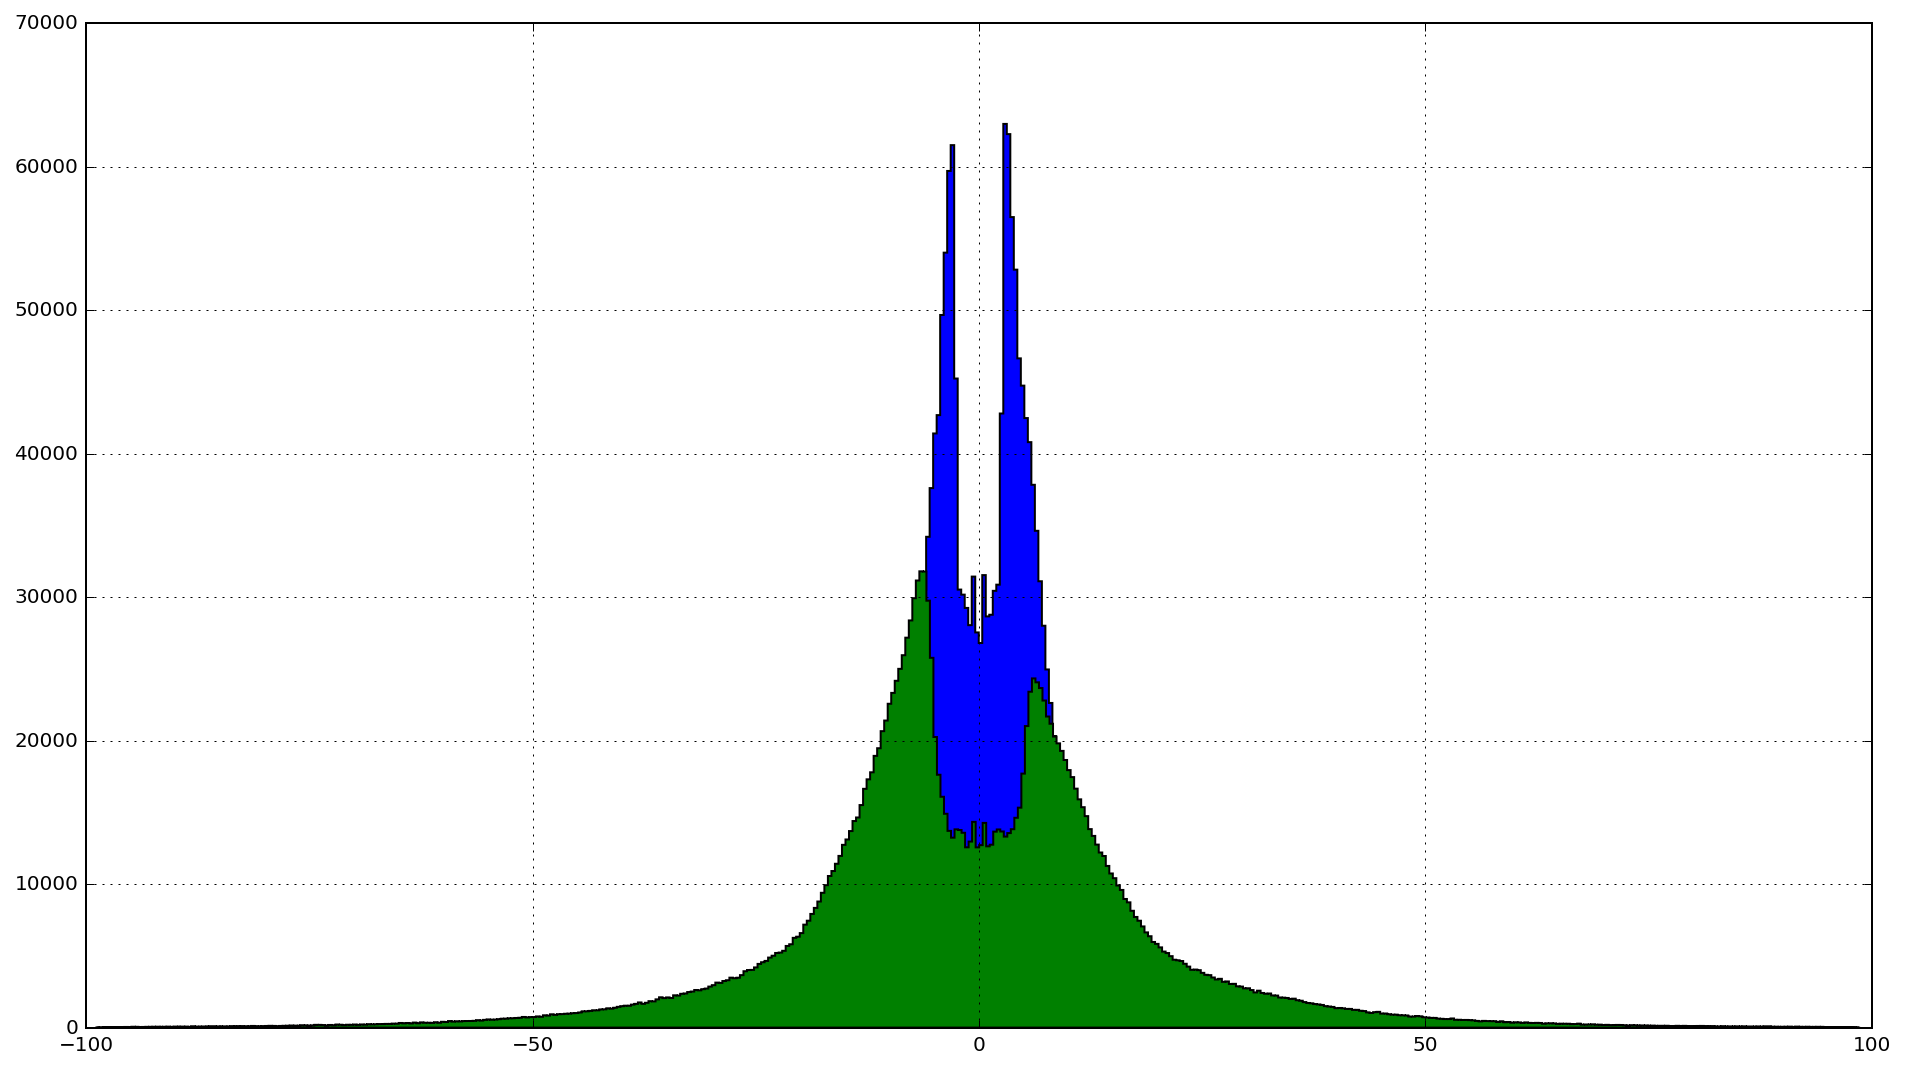

In [26]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
muon.pz2.hist(bins=500,histtype=u'stepfilled')
muon.pz1.hist(bins=500,histtype=u'stepfilled')

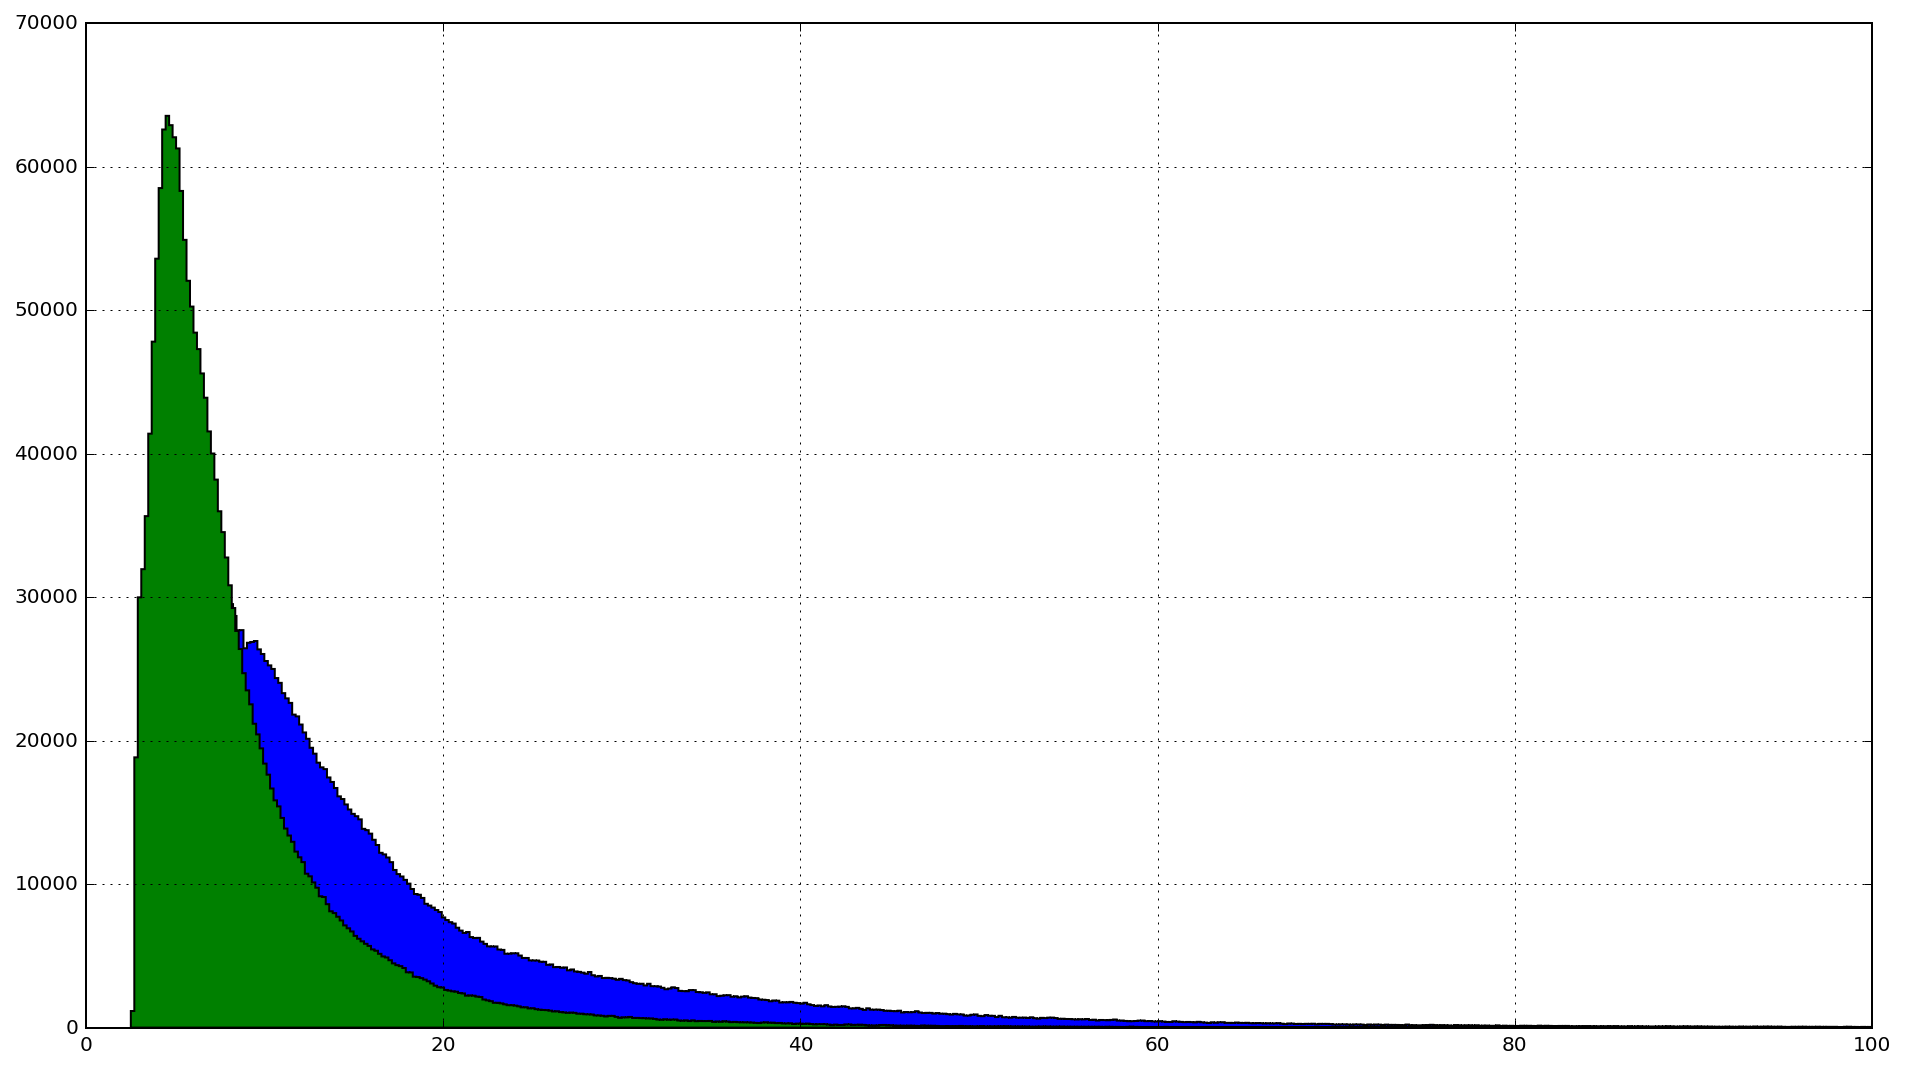

In [27]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
muon.E1.hist(bins=500,histtype=u'stepfilled')
muon.E2.hist(bins=500,histtype=u'stepfilled')

In [28]:
#from ROOT import TLorentzVector
#print len(muon)
#for i in xrange(len(muon)):
#    vec1 = TLorentzVector(muon.px1[i],muon.py1[i],muon.pz1[i],muon.E1[i])
#    vec2 = TLorentzVector(muon.px2[i],muon.py2[i],muon.pz2[i],muon.E2[i])
#    mass = (vec1 + vec2).M()

#fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
#plt.hist(mass,bins=500,histtype=u'stepfilled')
#plt.hist(muon.M,bins=500,histtype=u'stepfilled')
#plt.hist(muon.E2,bins=500,histtype=u'stepfilled')
#plt.show()

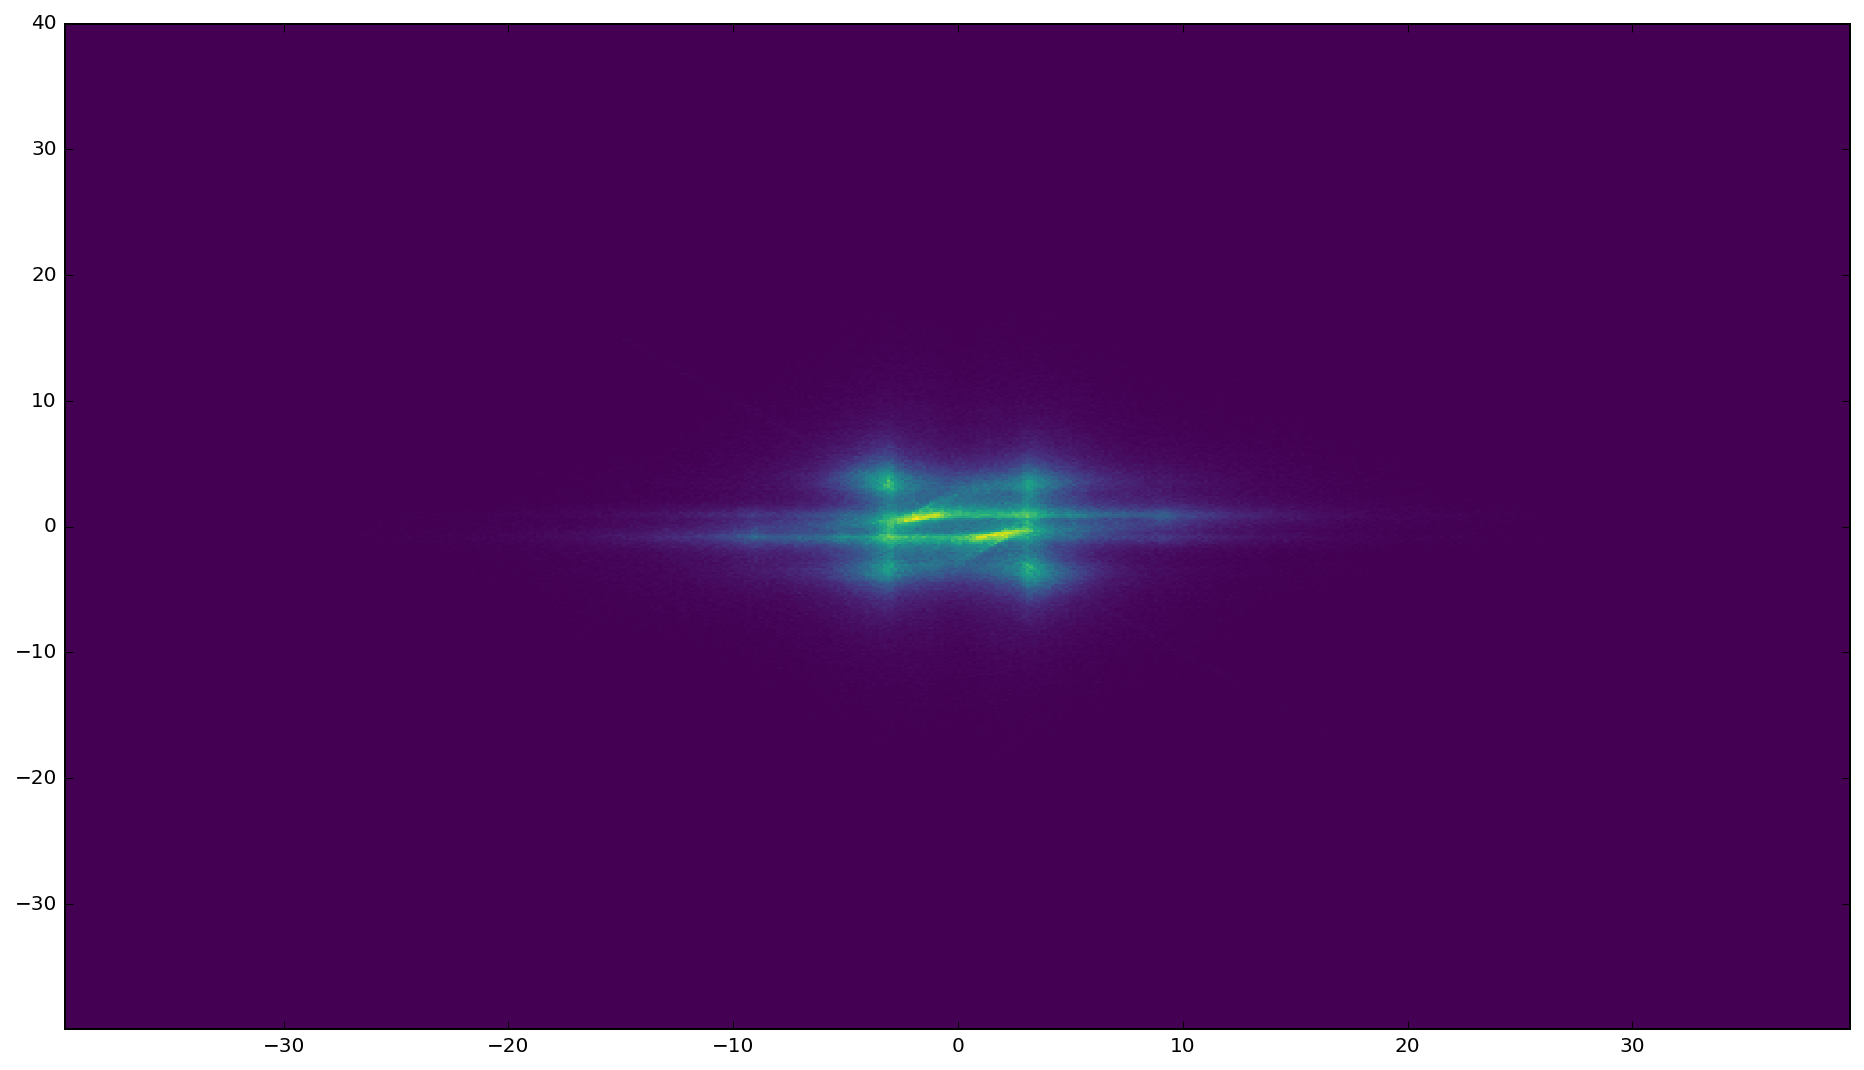

In [29]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(muon.px1,muon.px2,bins=500,cmap='viridis')
plt.show()

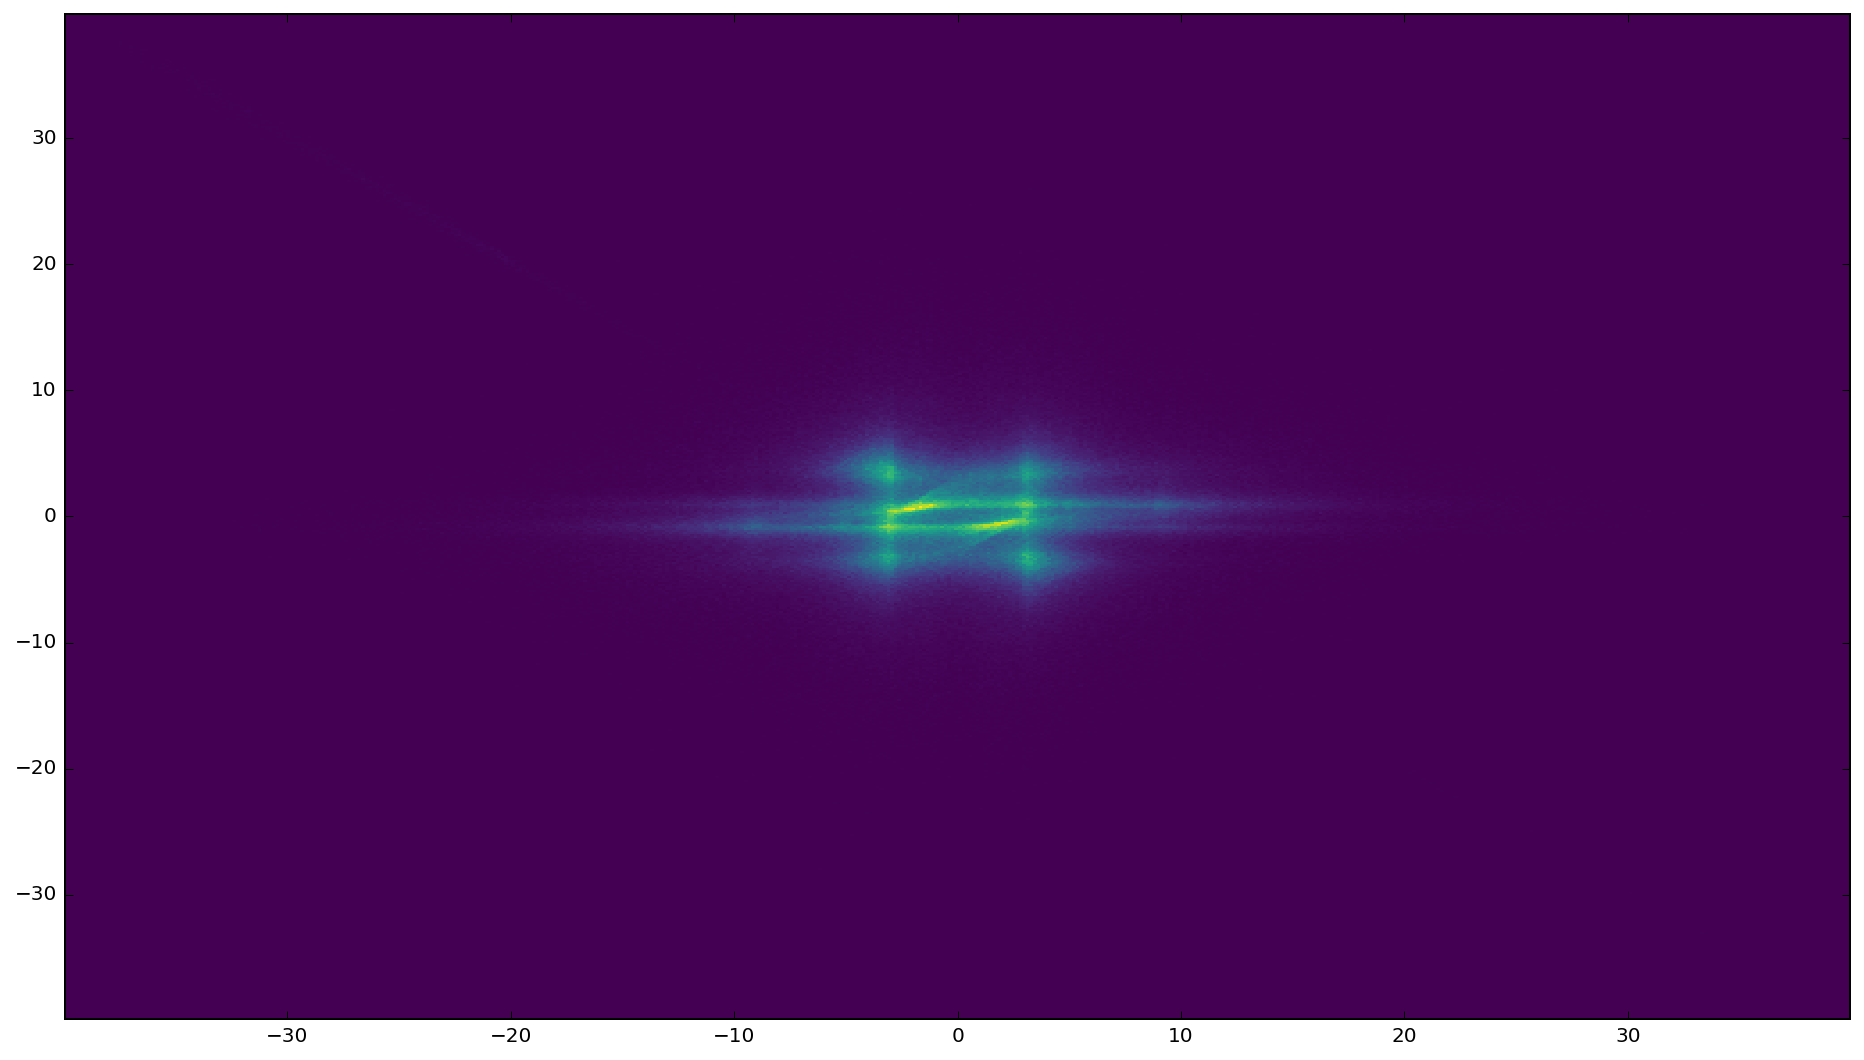

In [30]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(muon.py1,muon.py2,bins=500,cmap='viridis')
plt.show()

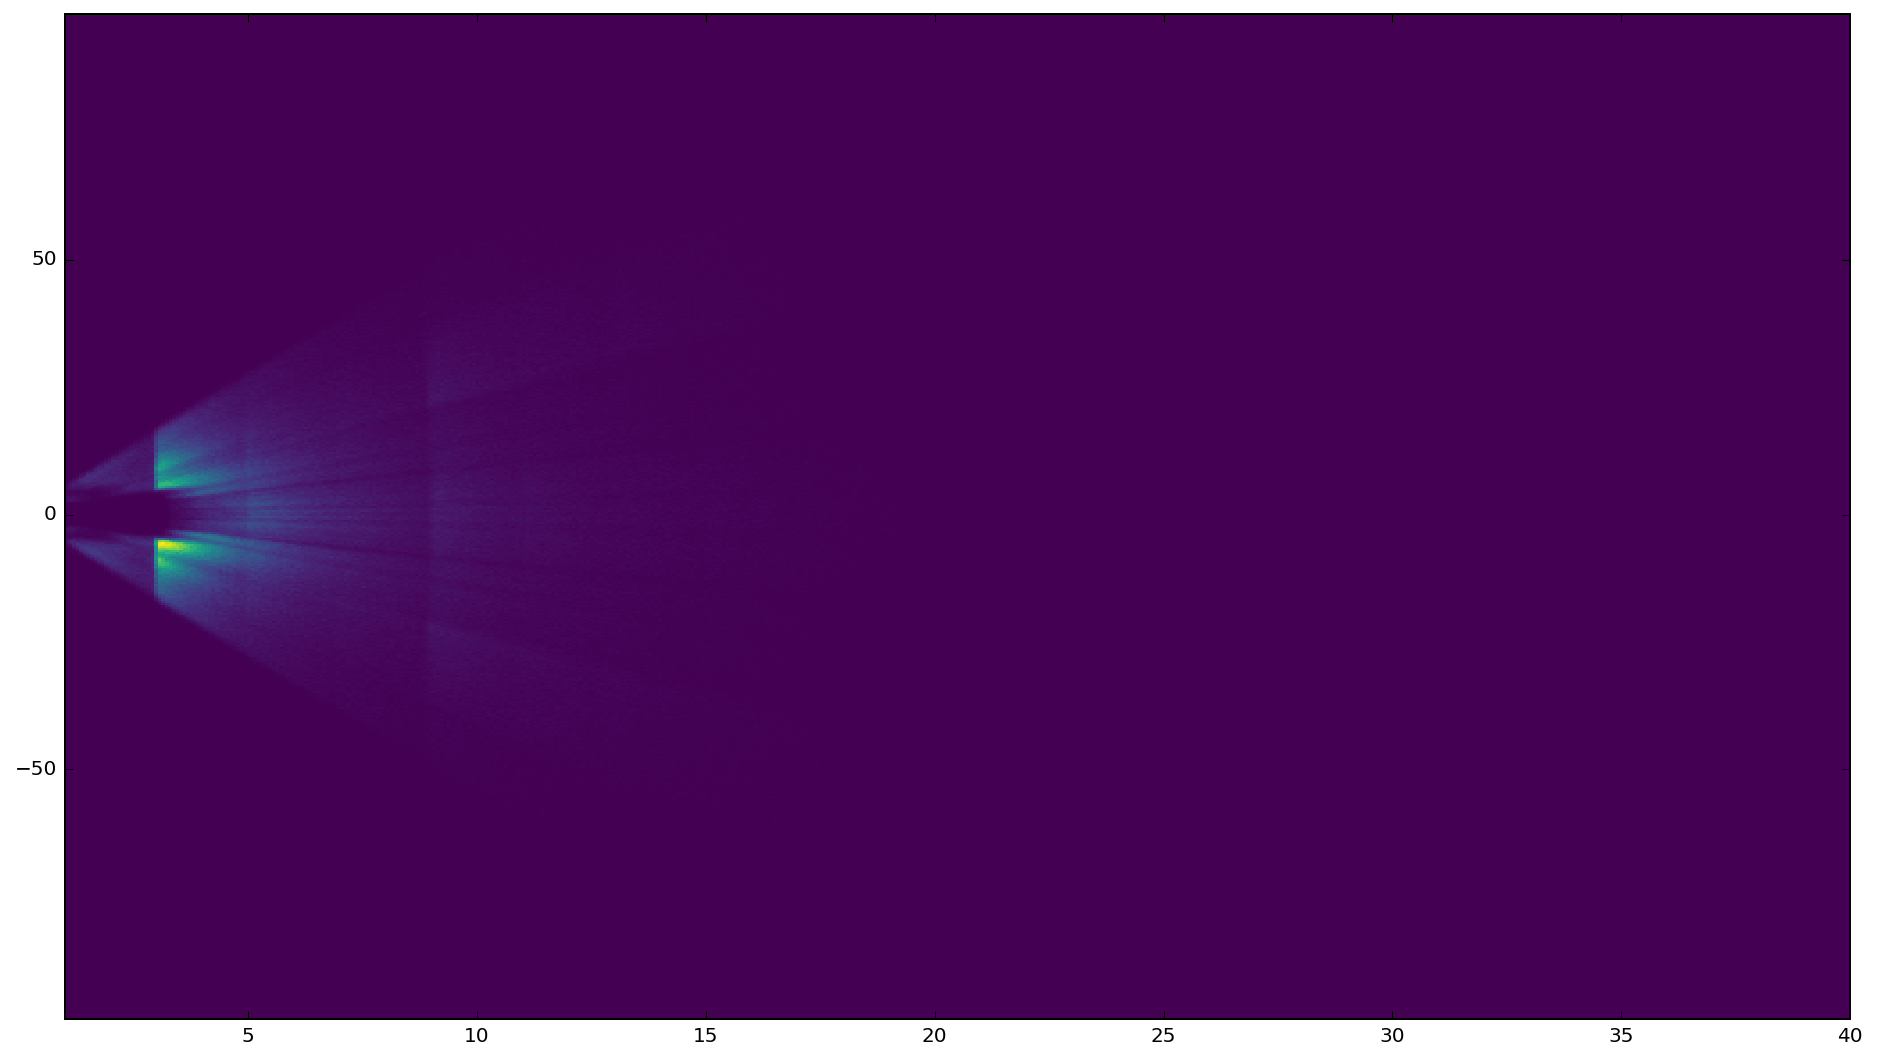

In [31]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(muon.pt1,muon.pz1,bins=500,cmap='viridis')
plt.show()

In [32]:
#ax = scatter_matrix(muon, alpha=0.2, figsize=(20, 15),diagonal='kde')

In [33]:
muon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023191 entries, 0 to 2042989
Data columns (total 19 columns):
E1       float64
px1      float64
py1      float64
pz1      float64
pt1      float64
eta1     float64
phi1     float64
Q1       int64
E2       float64
px2      float64
py2      float64
pz2      float64
pt2      float64
eta2     float64
phi2     float64
Q2       int64
M        float64
mass1    float64
mass2    float64
dtypes: float64(17), int64(2)
memory usage: 308.7 MB


In [34]:
muon.describe()

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M,mass1,mass2
count,2.023191e+06,2.023191e+06,2.023191e+06,2.023191e+06,2.023191e+06,2.023191e+06,2.023191e+06,2.023191e+06,2.023191e+06,2.023191e+06,2.023191e+06,2.023191e+06,2.023191e+06,2.023191e+06,2.023191e+06,2.023191e+06,2.023191e+06,2.022197e+06,2.023082e+06
mean,1.675310e+01,-4.975475e-02,-1.359999e-01,-9.384659e-01,7.169642e+00,-1.249614e-01,-3.403512e-02,1.981573e-02,8.765280e+00,1.733005e-02,1.124687e-01,8.574527e-01,4.758195e+00,1.196568e-01,2.762007e-02,4.939227e-03,9.826699e+00,1.053903e-01,1.055947e-01
std,1.286950e+01,6.033102e+00,6.150543e+00,1.926526e+01,4.779611e+00,1.513254e+00,1.820217e+00,9.998039e-01,6.838279e+00,4.235966e+00,4.356019e+00,9.269012e+00,3.780321e+00,1.389177e+00,1.813029e+00,9.999880e-01,8.427262e+00,8.015737e-03,3.705665e-03
min,2.575410e+00,-3.973960e+01,-3.996340e+01,-9.887040e+01,1.000040e+00,-2.807100e+00,-3.141590e+00,-1.000000e+00,2.502240e+00,-3.991030e+01,-3.981830e+01,-9.784820e+01,5.118510e-01,-2.722810e+00,-3.141590e+00,-1.000000e+00,2.000000e+00,5.666575e-04,8.447488e-04
25%,8.429145e+00,-3.503440e+00,-3.569300e+00,-1.096630e+01,3.886190e+00,-1.532420e+00,-1.622670e+00,-1.000000e+00,4.834780e+00,-2.305015e+00,-2.207835e+00,-4.174320e+00,2.249350e+00,-1.030860e+00,-1.537880e+00,-1.000000e+00,3.149330e+00,1.037835e-01,1.054414e-01
50%,1.245210e+01,-5.599400e-02,-1.534470e-01,-2.353960e+00,5.502940e+00,-3.187340e-01,-5.980230e-02,1.000000e+00,6.698910e+00,8.769340e-05,6.361370e-02,1.048910e+00,4.123130e+00,1.836220e-01,4.672910e-02,1.000000e+00,8.000630e+00,1.056590e-01,1.056583e-01
75%,1.996535e+01,3.434000e+00,3.391320e+00,9.524725e+00,9.252475e+00,1.383985e+00,1.538660e+00,1.000000e+00,1.008360e+01,2.352610e+00,2.408580e+00,5.447975e+00,5.754290e+00,1.381665e+00,1.602630e+00,1.000000e+00,1.321380e+01,1.075221e-01,1.058746e-01
max,9.999840e+01,3.969160e+01,3.995750e+01,9.812900e+01,3.999890e+01,2.689350e+00,3.141590e+00,1.000000e+00,9.996660e+01,3.996350e+01,3.981570e+01,9.858830e+01,3.999770e+01,2.713650e+00,3.141590e+00,1.000000e+00,1.099090e+02,1.769097e-01,1.682144e-01


(0, 40000)

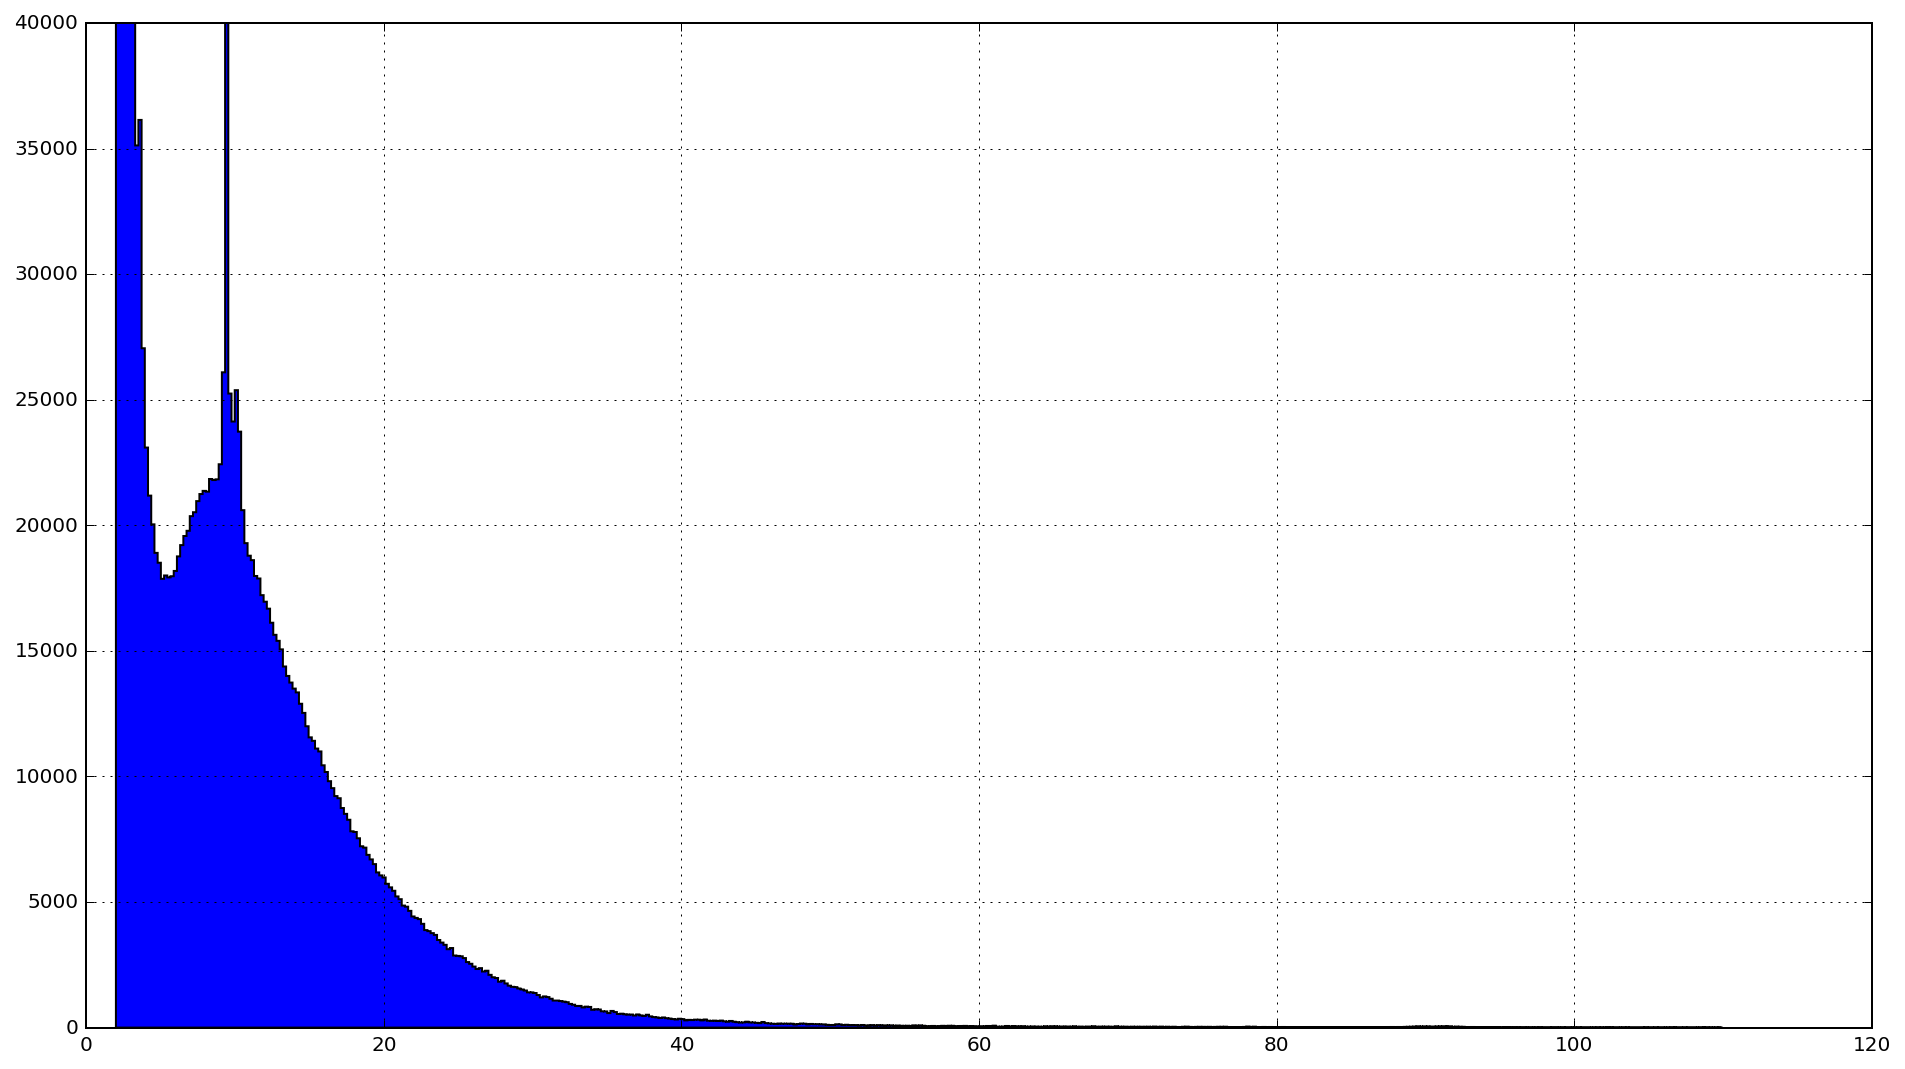

In [35]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
ax = muon[muon.M > 1].M.hist(bins=500,histtype=u'stepfilled')
ax.set_ylim([0, 40000])

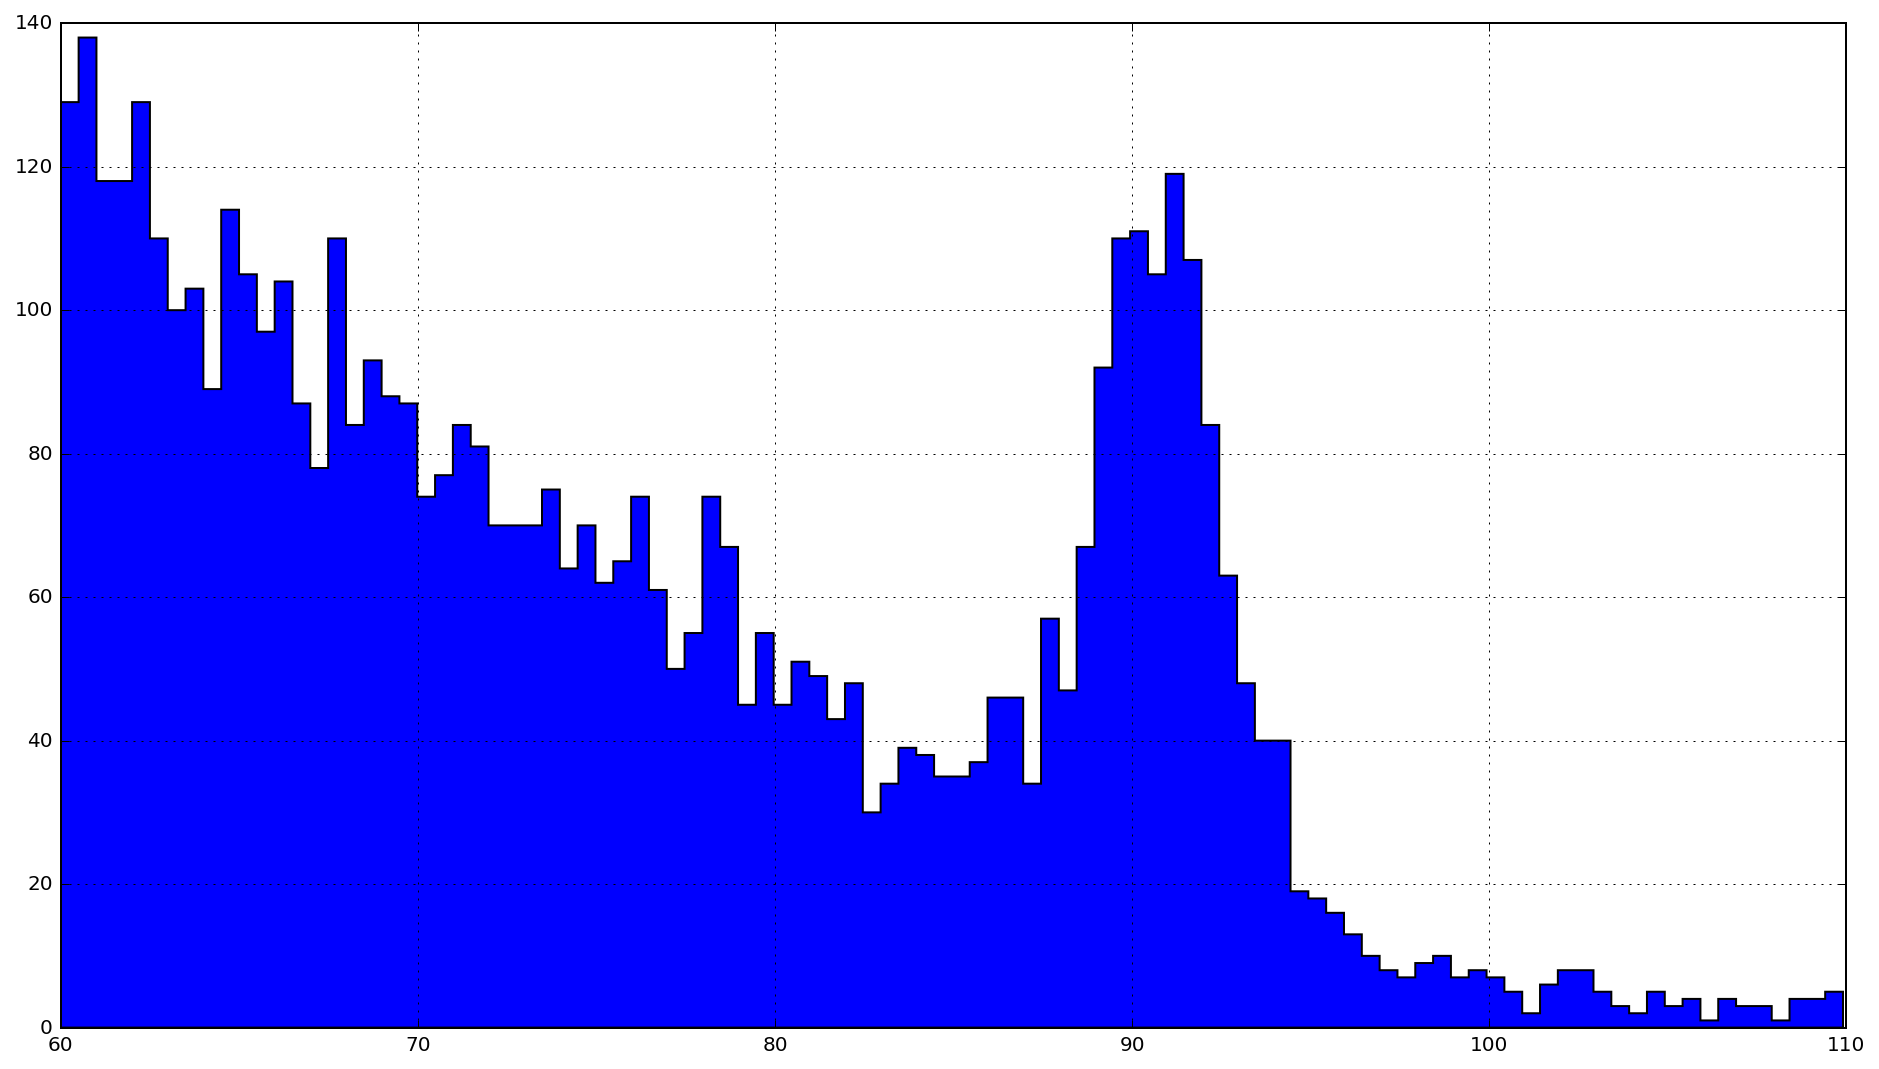

In [36]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
muon[muon.M > 60].M.hist(bins=100,histtype=u'stepfilled')

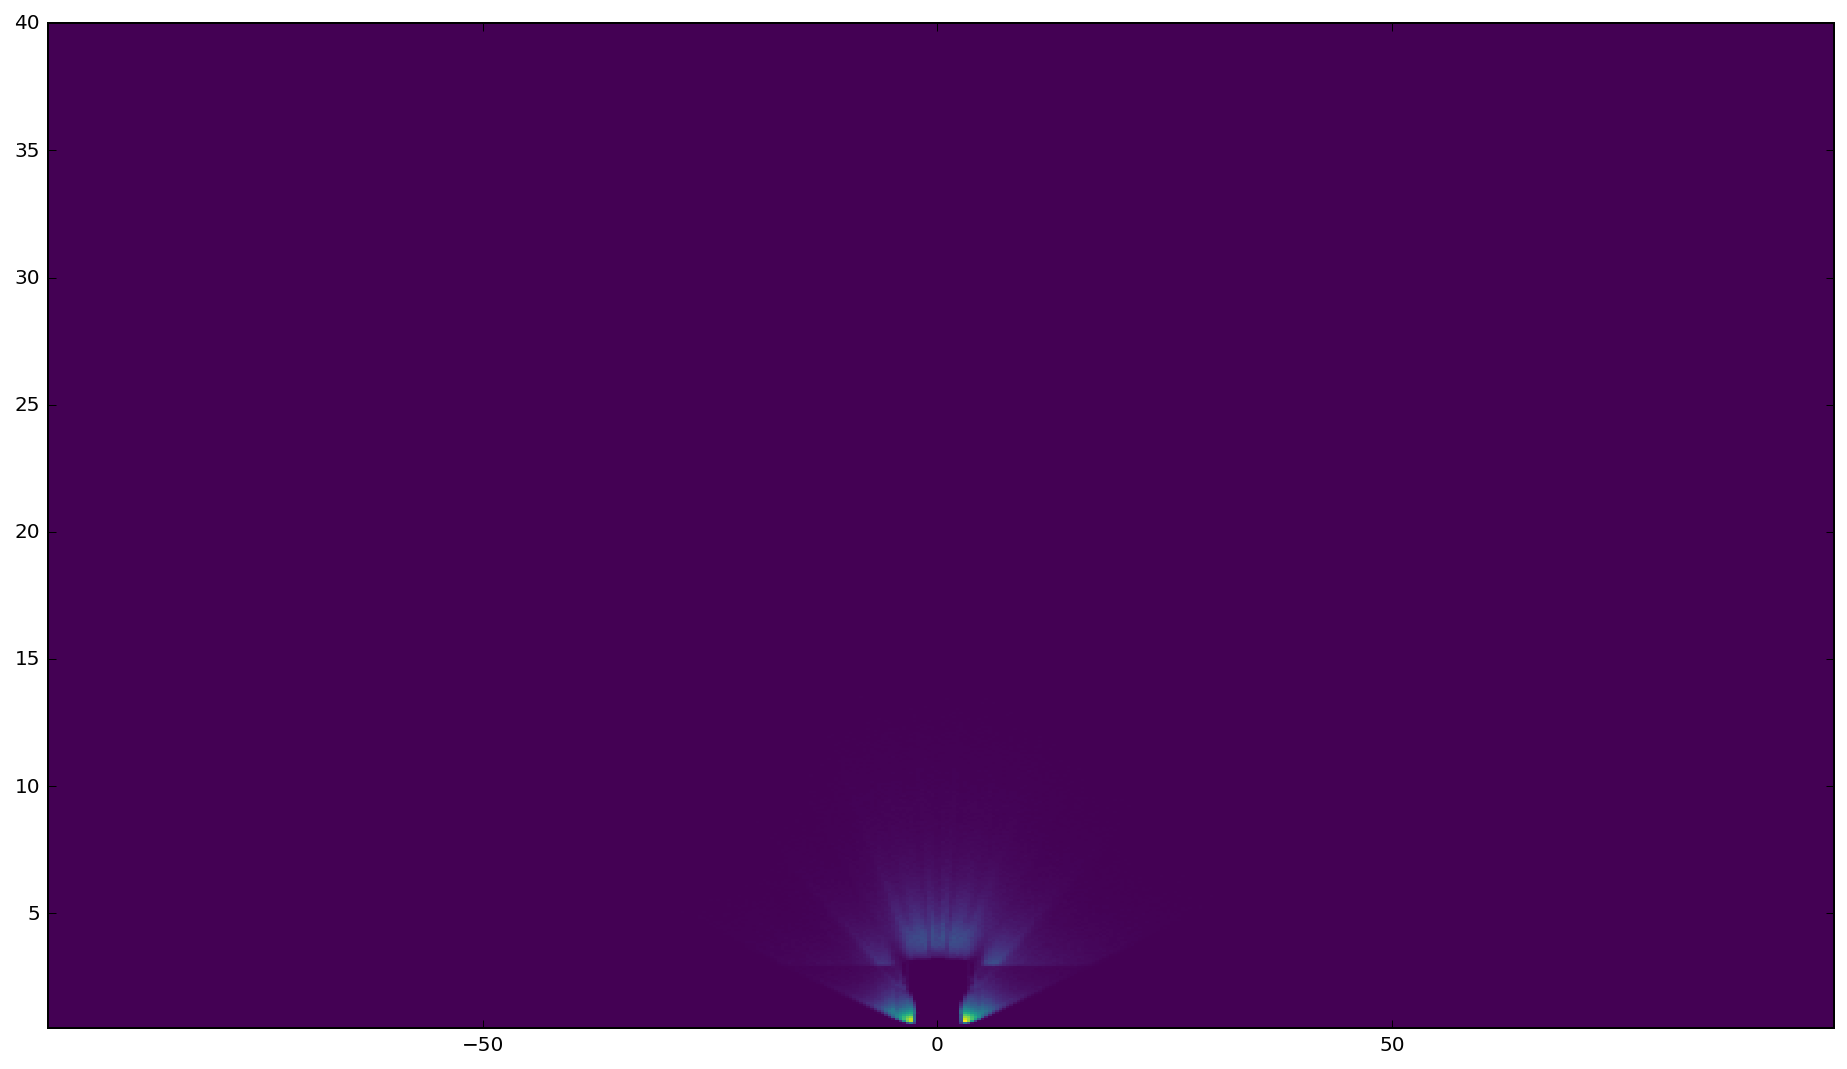

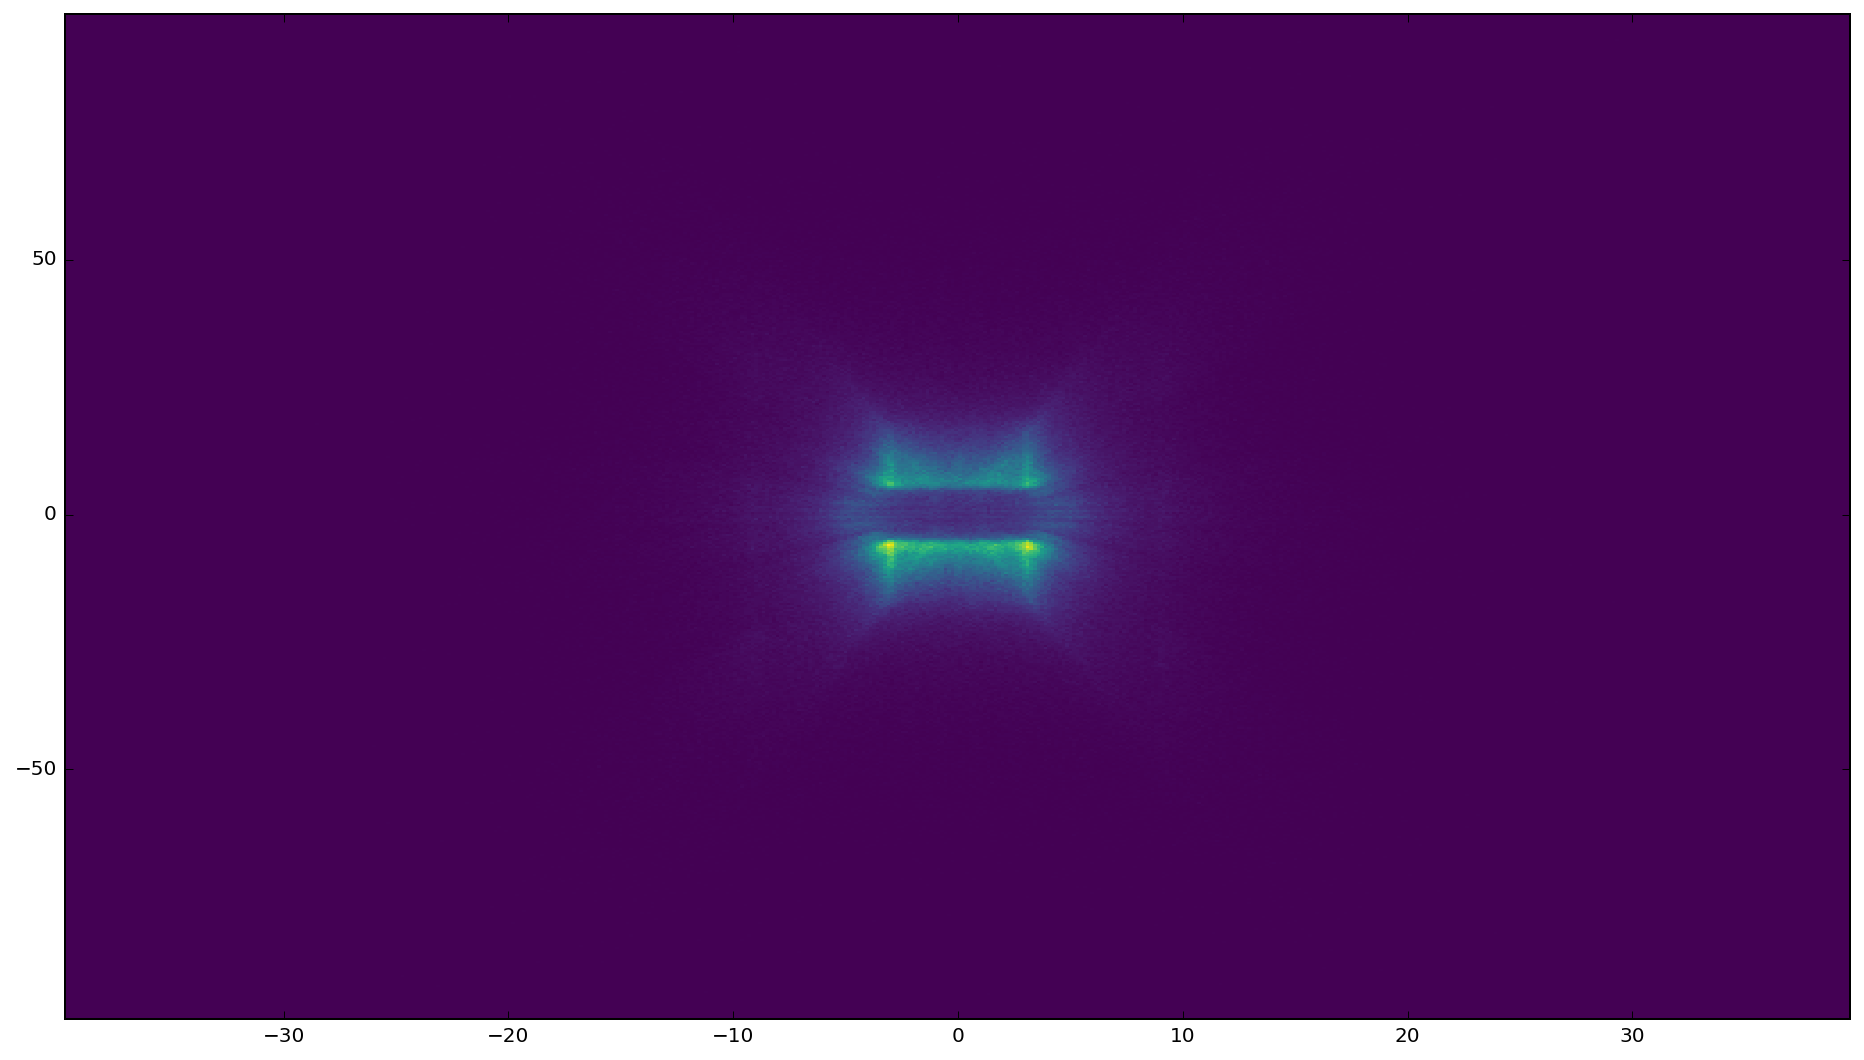

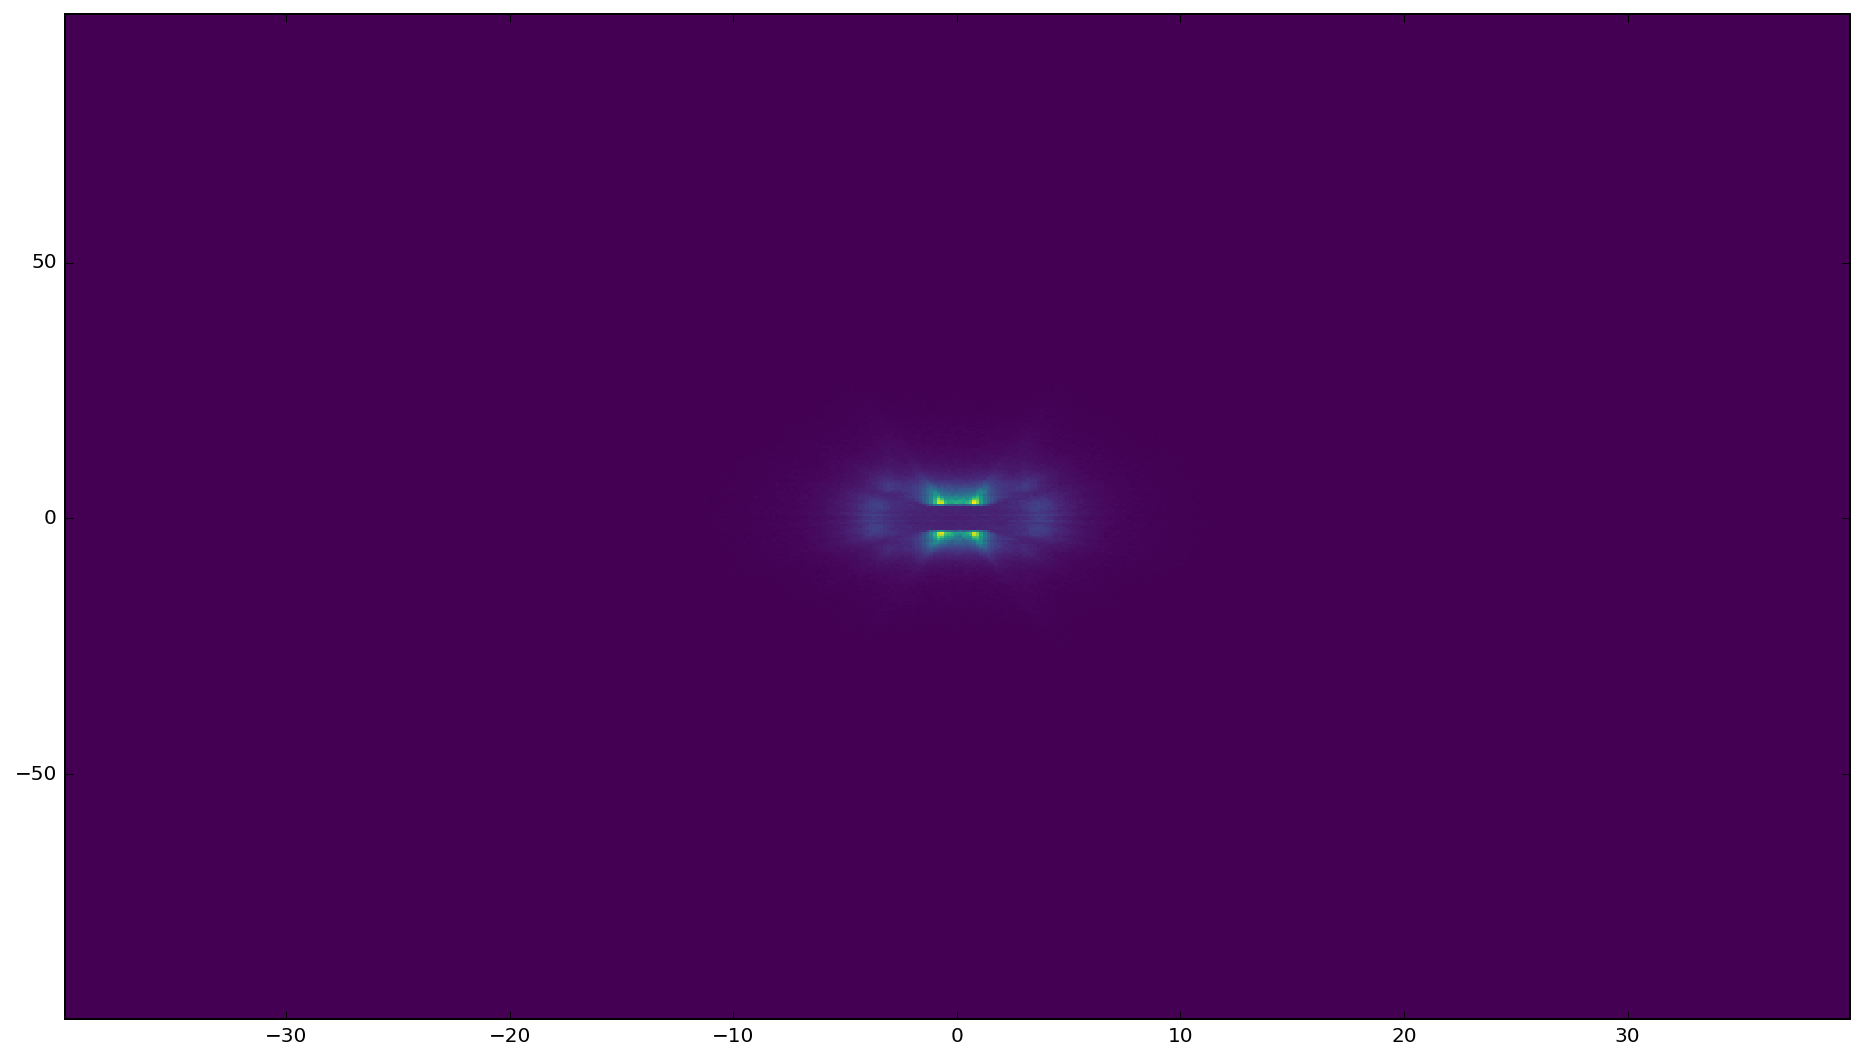

In [37]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(muon.pz2,muon.pt2,bins=500,cmap='viridis')
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(muon.px1,muon.pz1,bins=500,cmap='viridis')
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(muon.px2,muon.pz2,bins=500,cmap='viridis')
plt.show()

In [38]:
#from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.cm as cm
#fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
#ax = fig.add_subplot(111, projection='3d')

#mus = muon.T
#uniq_mus = np.unique(mus)
#values = cm.viridis(np.linspace(0,1,len(uniq_mus)))
#values = cm.Paired(np.linspace(0,1,len(uniq_mom)))
#col = dict(zip(uniq_mus, values))


#for mu in uniq_mus:
#    xs = muon.px1
#    ys = muon.py1
#    zs = muon.pz1
#    ax.scatter(xs, ys, zs,alpha=1,color=col[mu])
#ax.scatter(muon.pz1, muon.pz2, muon.M,alpha=0.1)
#plt.show()

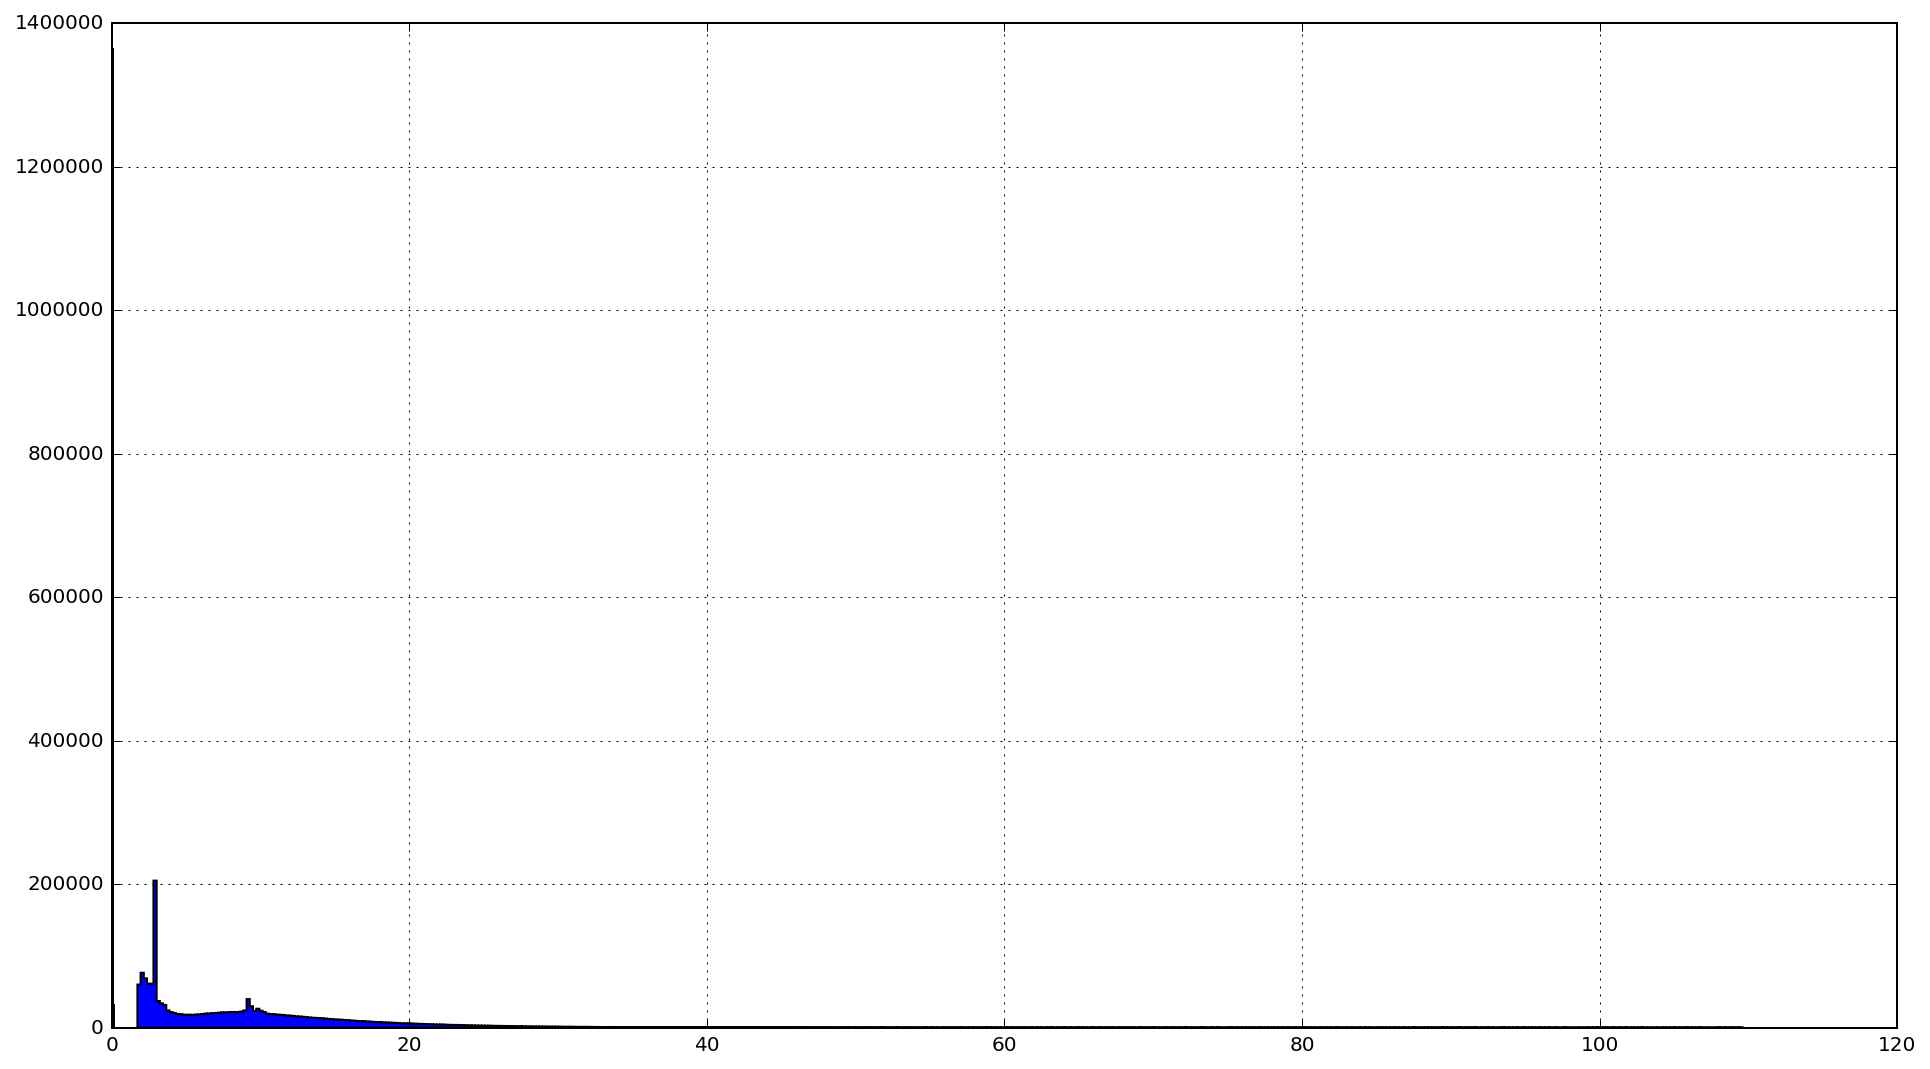

In [39]:
muon['missing'] = (muon.M - muon.mass1 - muon.mass2)

fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
muon.missing.hist(bins=500,histtype=u'stepfilled')
muon.mass1.hist()

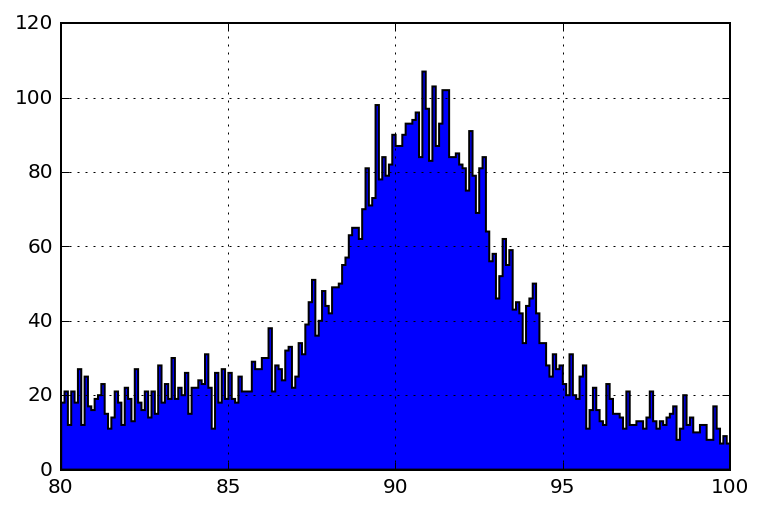

In [15]:
Zs = df[df.M < 100]
Zs = Zs[Zs.M > 80]

Zs = Zs[abs(Zs.pt1) < 100]
Zs = Zs[abs(Zs.pt2) < 100]
Zs = Zs.drop(['Event','Run','Type1','Type2'],axis=1)

Zs.M.hist(bins=200,histtype=u'stepfilled')


#fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
#plt.hist2d(Zs.px1,Zs.pt1,bins=500,cmap='viridis')
#fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
#plt.hist2d(Zs.py1,Zs.pt1,bins=500,cmap='viridis')
#fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
#plt.hist2d(Zs.pz1,Zs.pt1,bins=500,cmap='viridis')
plt.show()

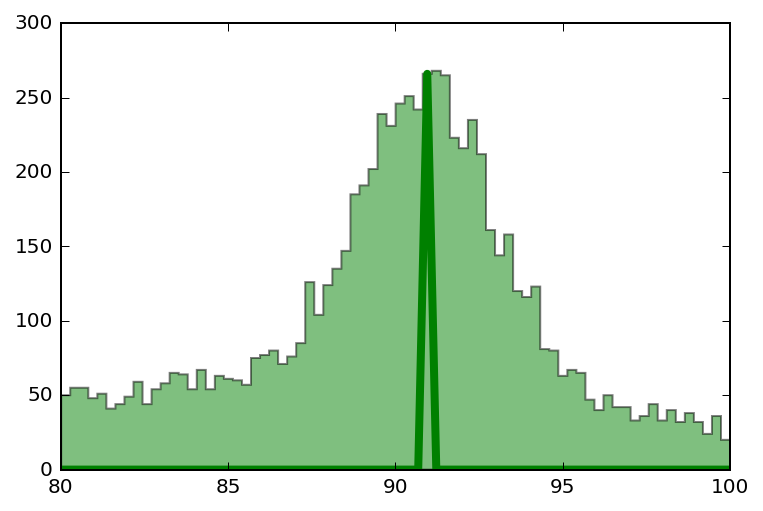

In [19]:
from scipy.optimize import curve_fit

Zs = df[df.M < 100]
Zs = Zs[Zs.M > 80]

def BW(Energy, Mass, Gamma):
    g = ((Mass**2.0 + Gamma**2.0)*Mass**2.0)**(1.0/2.0)
    k = (2.0 * 2.0**(1.0/2.0) * Mass * Gamma * g)/(np.pi * (Mass**(2.0)+g)**(1.0/2.0))
    return (k/((Energy**2.0-Mass**2.0)**2.0 + (Gamma*Mass)**2.0))

def P_fac(Energy,Mass):
    m_mu = 0.105
    p = ((Energy**2.0/4.0)-m_mu**2.0)**(1.0/2.0)
    p0 = ((Mass**2.0/4.0)-m_mu**2.0)**(1.0/2.0)
    return (p/p0)**3.0

def BW_2(Energy,Mass,Gamma):
    g = ((Mass**2.0 + Gamma*P_fac(Energy,Mass)**2.0)*Mass**2.0)**(1.0/2.0)
    k = (2.0 * 2.0**(1.0/2.0) * Mass * Gamma*P_fac(Energy,Mass) * g)/(np.pi * (Mass**(2.0)+g)**(1.0/2.0))
    return (k/((Energy**2.0-Mass**2.0)**2.0 + (Gamma*P_fac(Energy,Mass)*Mass)**2.0))


bins = len(Zs)/100

hist, bin_edges = np.histogram(Zs.M,bins=bins)
xdata = 0.5*(bin_edges[1:]+bin_edges[:-1])
ydata = hist

n, bins, patches = plt.hist(Zs.M, bins, histtype=u'stepfilled',facecolor='g' , alpha=0.5)

x0 = np.array([91,100])

popt, pcov = curve_fit(BW_2, xdata, ydata, p0=x0)
perr = np.sqrt(np.diag(pcov))
plt.plot(xdata,BW_2(xdata,popt[0],popt[1]),'g-', lw=4)